In [1]:
# импортируем необходимые библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import re

# Считывание CSV-файла в объект DataFrame

In [2]:
# записываем CSV-файл в объект DataFrame
data = pd.read_csv('Data/credit_train.csv', encoding='cp1251', sep=';')

In [3]:
# смотрим форму датафрейма
data.shape

(170746, 15)

In [4]:
# выводим первые 5 наблюдений датафрейма
data.head()

,client_id,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,monthly_income,credit_count,overdue_credit_count,open_account_flg
0,1,M,NaN,NaN,UMN,"59998,00",10,1.6,NaN,GRD,КРАСНОДАРСКИЙ КРАЙ,30000.0,1.0,1.0,0
1,2,F,NaN,MAR,UMN,"10889,00",6,1.1,NaN,NaN,МОСКВА,NaN,2.0,0.0,0
2,3,M,32.0,MAR,SPC,"10728,00",12,1.1,NaN,NaN,ОБЛ САРАТОВСКАЯ,NaN,5.0,0.0,0
3,4,F,27.0,NaN,SPC,"12009,09",12,1.1,NaN,NaN,ОБЛ ВОЛГОГРАДСКАЯ,NaN,2.0,0.0,0
4,5,M,45.0,NaN,SPC,NaN,10,1.1,"0,421385",SCH,ЧЕЛЯБИНСКАЯ ОБЛАСТЬ,NaN,1.0,0.0,0


In [5]:
# удаляем переменную client_id
data.drop('client_id', axis=1, inplace=True)

# выводим первые 5 наблюдений датафрейма
data.head()

,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,monthly_income,credit_count,overdue_credit_count,open_account_flg
0,M,NaN,NaN,UMN,"59998,00",10,1.6,NaN,GRD,КРАСНОДАРСКИЙ КРАЙ,30000.0,1.0,1.0,0
1,F,NaN,MAR,UMN,"10889,00",6,1.1,NaN,NaN,МОСКВА,NaN,2.0,0.0,0
2,M,32.0,MAR,SPC,"10728,00",12,1.1,NaN,NaN,ОБЛ САРАТОВСКАЯ,NaN,5.0,0.0,0
3,F,27.0,NaN,SPC,"12009,09",12,1.1,NaN,NaN,ОБЛ ВОЛГОГРАДСКАЯ,NaN,2.0,0.0,0
4,M,45.0,NaN,SPC,NaN,10,1.1,"0,421385",SCH,ЧЕЛЯБИНСКАЯ ОБЛАСТЬ,NaN,1.0,0.0,0


In [6]:
# смотрим уникальные значения
# по переменной living_region
data['living_region'].unique()

array(['КРАСНОДАРСКИЙ КРАЙ', 'МОСКВА', 'ОБЛ САРАТОВСКАЯ',
       'ОБЛ ВОЛГОГРАДСКАЯ', 'ЧЕЛЯБИНСКАЯ ОБЛАСТЬ', 'СТАВРОПОЛЬСКИЙ КРАЙ',
       'ОБЛ НИЖЕГОРОДСКАЯ', 'МОСКОВСКАЯ ОБЛ',
       'ХАНТЫ-МАНСИЙСКИЙ АВТОНОМНЫЙ ОКРУГ - ЮГРА', 'КРАЙ СТАВРОПОЛЬСКИЙ',
       'САНКТ-ПЕТЕРБУРГ', 'РЕСП. БАШКОРТОСТАН', 'ОБЛ АРХАНГЕЛЬСКАЯ',
       'ХАНТЫ-МАНСИЙСКИЙ АО', 'РЕСП БАШКОРТОСТАН', 'ПЕРМСКИЙ КРАЙ',
       'РЕСП КАРАЧАЕВО-ЧЕРКЕССКАЯ', 'САРАТОВСКАЯ ОБЛ', 'ОБЛ КАЛУЖСКАЯ',
       'ОБЛ ВОЛОГОДСКАЯ', 'РОСТОВСКАЯ ОБЛ', 'УДМУРТСКАЯ РЕСП',
       'ОБЛ ИРКУТСКАЯ', 'ПРИВОЛЖСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ', 'ОБЛ МОСКОВСКАЯ',
       'ОБЛ ТЮМЕНСКАЯ', 'ОБЛ БЕЛГОРОДСКАЯ', 'РОСТОВСКАЯ ОБЛАСТЬ',
       'ОБЛ КОСТРОМСКАЯ', 'РЕСП ХАКАСИЯ', 'РЕСПУБЛИКА ТАТАРСТАН',
       'ИРКУТСКАЯ ОБЛАСТЬ', 'ОБЛ СВЕРДЛОВСКАЯ', 'ОБЛ ПСКОВСКАЯ',
       'КРАЙ ЗАБАЙКАЛЬСКИЙ', 'СВЕРДЛОВСКАЯ ОБЛ', 'ОБЛ ОРЕНБУРГСКАЯ',
       'ОБЛ ВОРОНЕЖСКАЯ', 'ОБЛ АСТРАХАНСКАЯ', 'ОБЛ НОВОСИБИРСКАЯ',
       'ОБЛ ЧЕЛЯБИНСКАЯ', 'ОРЕНБУРГСКАЯ ОБЛ', 'СВЕРДЛОВСКАЯ ОБЛАСТЬ'

In [7]:
# смотрим количество уникальных значений
# переменной living_region
data['living_region'].nunique()

301

In [8]:
# увеличиваем максимальное количество
# отображаемых строк
pd.options.display.max_rows = 310

In [9]:
# уникальные значения переменной living_region 
# записываем в отдельный объект regions
regions = data['living_region'].unique()

In [10]:
# создаем серию, у которой в качестве значений и индексных
# меток будут выступать уникальные значения переменной
# living_region, записанные в regions
regions = pd.Series(data=regions, index=regions, name='regions')
regions

КРАСНОДАРСКИЙ КРАЙ                                                КРАСНОДАРСКИЙ КРАЙ
МОСКВА                                                                        МОСКВА
ОБЛ САРАТОВСКАЯ                                                      ОБЛ САРАТОВСКАЯ
ОБЛ ВОЛГОГРАДСКАЯ                                                  ОБЛ ВОЛГОГРАДСКАЯ
ЧЕЛЯБИНСКАЯ ОБЛАСТЬ                                              ЧЕЛЯБИНСКАЯ ОБЛАСТЬ
СТАВРОПОЛЬСКИЙ КРАЙ                                              СТАВРОПОЛЬСКИЙ КРАЙ
ОБЛ НИЖЕГОРОДСКАЯ                                                  ОБЛ НИЖЕГОРОДСКАЯ
МОСКОВСКАЯ ОБЛ                                                        МОСКОВСКАЯ ОБЛ
ХАНТЫ-МАНСИЙСКИЙ АВТОНОМНЫЙ ОКРУГ - ЮГРА    ХАНТЫ-МАНСИЙСКИЙ АВТОНОМНЫЙ ОКРУГ - ЮГРА
КРАЙ СТАВРОПОЛЬСКИЙ                                              КРАЙ СТАВРОПОЛЬСКИЙ
САНКТ-ПЕТЕРБУРГ                                                      САНКТ-ПЕТЕРБУРГ
РЕСП. БАШКОРТОСТАН                                               

In [11]:
# задаем стоп-слова
stopwrds = set(['ОБЛ','ОБЛАСТЬ', 'РЕСП', 'РЕСПУБЛИКА', 
                'КРАЙ', 'Г', 'АО', 'АОБЛ', 'АВТОНОМНАЯ'])

In [12]:
# пишем функцию для предобработки значений серии
def clean_region(x):
    x = re.sub('[.,]+', ' ', str(x))
    wrds = x.split(' ')
    wrds_new = []
    for w in wrds:
        if not w in stopwrds:
            wrds_new.append(w)
    x = ''.join(wrds_new)
    return x

# применяем функцию к нашей серии
regions = regions.map(clean_region)

In [13]:
# смотрим результаты применения функции
regions

КРАСНОДАРСКИЙ КРАЙ                                                 КРАСНОДАРСКИЙ
МОСКВА                                                                    МОСКВА
ОБЛ САРАТОВСКАЯ                                                      САРАТОВСКАЯ
ОБЛ ВОЛГОГРАДСКАЯ                                                  ВОЛГОГРАДСКАЯ
ЧЕЛЯБИНСКАЯ ОБЛАСТЬ                                                  ЧЕЛЯБИНСКАЯ
СТАВРОПОЛЬСКИЙ КРАЙ                                               СТАВРОПОЛЬСКИЙ
ОБЛ НИЖЕГОРОДСКАЯ                                                  НИЖЕГОРОДСКАЯ
МОСКОВСКАЯ ОБЛ                                                        МОСКОВСКАЯ
ХАНТЫ-МАНСИЙСКИЙ АВТОНОМНЫЙ ОКРУГ - ЮГРА    ХАНТЫ-МАНСИЙСКИЙАВТОНОМНЫЙОКРУГ-ЮГРА
КРАЙ СТАВРОПОЛЬСКИЙ                                               СТАВРОПОЛЬСКИЙ
САНКТ-ПЕТЕРБУРГ                                                  САНКТ-ПЕТЕРБУРГ
РЕСП. БАШКОРТОСТАН                                                  БАШКОРТОСТАН
ОБЛ АРХАНГЕЛЬСКАЯ           

In [14]:
# вносим финальные корректировки в regions
regions['ЧУКОТСКИЙ АO'] = 'ЧУКОТСКИЙ'
regions['ЧУВАШСКАЯ РЕСПУБЛИКА - ЧУВАШИЯ'] = 'ЧУВАШСКАЯ'
regions['ЧУВАШИЯ ЧУВАШСКАЯ РЕСПУБЛИКА -'] = 'ЧУВАШСКАЯ'
regions['ЧУВАШСКАЯ - ЧУВАШИЯ РЕСП'] = 'ЧУВАШСКАЯ'
regions['РЕСП ЧУВАШСКАЯ - ЧУВАШИЯ'] = 'ЧУВАШСКАЯ'
regions['ЧУВАШСКАЯ - ЧУВАШИЯ РЕСП'] = 'ЧУВАШСКАЯ'
regions['РЕСПУБЛИКАТАТАРСТАН'] = 'ТАТАРСТАН'
regions['ПРИВОЛЖСКИЙ ФЕДЕРАЛЬНЫЙ ОКРУГ'] = 'МОСКОВСКАЯ'
regions['ПЕРМСКАЯ ОБЛ'] = 'ПЕРМСКИЙ'
regions['ОРЁЛ'] = 'ОРЛОВСКАЯ'
regions['Г.ОДИНЦОВО МОСКОВСКАЯ ОБЛ'] = 'МОСКОВСКАЯ'
regions['МЫТИЩИНСКИЙ Р-Н'] = 'МОСКОВСКАЯ'
regions['МОСКОВСКИЙ П'] = 'МОСКОВСКАЯ'
regions['КАМЧАТСКАЯ ОБЛАСТЬ'] = 'КАМЧАТСКИЙ'
regions['ДАЛЬНИЙ ВОСТОК'] = 'МОСКОВСКАЯ'
regions['ДАЛЬНИЙВОСТОК'] = 'МОСКОВСКАЯ'
regions['ГУСЬ-ХРУСТАЛЬНЫЙ Р-Н'] = 'ВЛАДИМИРСКАЯ'
regions['ГОРЬКОВСКАЯ ОБЛ'] = 'НИЖЕГОРОДСКАЯ'
regions['ЭВЕНКИЙСКИЙ АО'] = 'КРАСНОЯРСКИЙ'
regions['ХАНТЫ-МАНСИЙСКИЙ АВТОНОМНЫЙ ОКРУГ - ЮГРА'] = 'ХАНТЫ-МАНСИЙСКИЙ'
regions['АО ХАНТЫ-МАНСИЙСКИЙ АВТОНОМНЫЙ ОКРУГ - Ю'] = 'ХАНТЫ-МАНСИЙСКИЙ'
regions['АО ХАНТЫ-МАНСИЙСКИЙ-ЮГРА'] = 'ХАНТЫ-МАНСИЙСКИЙ'
regions['СЕВ. ОСЕТИЯ - АЛАНИЯ'] = 'СЕВЕРНАЯОСЕТИЯ-АЛАНИЯ'
regions['РЕСП. САХА (ЯКУТИЯ)'] ='САХА/ЯКУТИЯ/'
regions['РЕСПУБЛИКА САХА'] = 'САХА/ЯКУТИЯ/'
regions['ДАЛЬНИЙВОСТОК'] = 'МОСКОВСКАЯ'
regions['САХА'] = 'САХА/ЯКУТИЯ/'
regions['98'] = 'САНКТ-ПЕТЕРБУРГ'
regions['74'] = 'ЧЕЛЯБИНСКАЯ'
regions['РОССИЯ'] = 'МОСКОВСКАЯ'
regions['МОСКВОСКАЯ'] = 'МОСКОВСКАЯ'
regions['МОСКВОСКАЯ ОБЛ'] = 'МОСКОВСКАЯ'
regions['ЧЕЛЯБИНСК'] = 'ЧЕЛЯБИНСКАЯ'
regions['Г. ЧЕЛЯБИНСК'] = 'ЧЕЛЯБИНСКАЯ'
regions['БРЯНСКИЙ'] = 'БРЯНСКАЯ'

In [15]:
# вновь смотрим серию
regions

КРАСНОДАРСКИЙ КРАЙ                                  КРАСНОДАРСКИЙ
МОСКВА                                                     МОСКВА
ОБЛ САРАТОВСКАЯ                                       САРАТОВСКАЯ
ОБЛ ВОЛГОГРАДСКАЯ                                   ВОЛГОГРАДСКАЯ
ЧЕЛЯБИНСКАЯ ОБЛАСТЬ                                   ЧЕЛЯБИНСКАЯ
СТАВРОПОЛЬСКИЙ КРАЙ                                СТАВРОПОЛЬСКИЙ
ОБЛ НИЖЕГОРОДСКАЯ                                   НИЖЕГОРОДСКАЯ
МОСКОВСКАЯ ОБЛ                                         МОСКОВСКАЯ
ХАНТЫ-МАНСИЙСКИЙ АВТОНОМНЫЙ ОКРУГ - ЮГРА         ХАНТЫ-МАНСИЙСКИЙ
КРАЙ СТАВРОПОЛЬСКИЙ                                СТАВРОПОЛЬСКИЙ
САНКТ-ПЕТЕРБУРГ                                   САНКТ-ПЕТЕРБУРГ
РЕСП. БАШКОРТОСТАН                                   БАШКОРТОСТАН
ОБЛ АРХАНГЕЛЬСКАЯ                                   АРХАНГЕЛЬСКАЯ
ХАНТЫ-МАНСИЙСКИЙ АО                              ХАНТЫ-МАНСИЙСКИЙ
РЕСП БАШКОРТОСТАН                                    БАШКОРТОСТАН
ПЕРМСКИЙ К

In [16]:
# заменяем исходные категории переменной 
# living_region на новые
data['living_region'] = data['living_region'].map(regions)

In [17]:
# смотрим уникальные значения
# по переменной living_region
data['living_region'].unique()

array(['КРАСНОДАРСКИЙ', 'МОСКВА', 'САРАТОВСКАЯ', 'ВОЛГОГРАДСКАЯ',
       'ЧЕЛЯБИНСКАЯ', 'СТАВРОПОЛЬСКИЙ', 'НИЖЕГОРОДСКАЯ', 'МОСКОВСКАЯ',
       'ХАНТЫ-МАНСИЙСКИЙ', 'САНКТ-ПЕТЕРБУРГ', 'БАШКОРТОСТАН',
       'АРХАНГЕЛЬСКАЯ', 'ПЕРМСКИЙ', 'КАРАЧАЕВО-ЧЕРКЕССКАЯ', 'КАЛУЖСКАЯ',
       'ВОЛОГОДСКАЯ', 'РОСТОВСКАЯ', 'УДМУРТСКАЯ', 'ИРКУТСКАЯ',
       'ТЮМЕНСКАЯ', 'БЕЛГОРОДСКАЯ', 'КОСТРОМСКАЯ', 'ХАКАСИЯ', 'ТАТАРСТАН',
       'СВЕРДЛОВСКАЯ', 'ПСКОВСКАЯ', 'ЗАБАЙКАЛЬСКИЙ', 'ОРЕНБУРГСКАЯ',
       'ВОРОНЕЖСКАЯ', 'АСТРАХАНСКАЯ', 'НОВОСИБИРСКАЯ', 'КУРГАНСКАЯ',
       'УЛЬЯНОВСКАЯ', 'МУРМАНСКАЯ', 'КРАСНОЯРСКИЙ', 'БУРЯТИЯ',
       'САХА/ЯКУТИЯ/', 'АМУРСКАЯ', 'ХАБАРОВСКИЙ', 'ЯМАЛО-НЕНЕЦКИЙ',
       'САМАРСКАЯ', 'ТВЕРСКАЯ', 'ЯРОСЛАВСКАЯ', 'ВЛАДИМИРСКАЯ',
       'ЛЕНИНГРАДСКАЯ', 'ОРЛОВСКАЯ', 'КЕМЕРОВСКАЯ', 'ОМСКАЯ', 'ЧЕЧЕНСКАЯ',
       'КУРСКАЯ', 'ТУЛЬСКАЯ', 'АДЫГЕЯ', 'КОМИ', 'ПРИМОРСКИЙ',
       'СМОЛЕНСКАЯ', 'КИРОВСКАЯ', 'ДАГЕСТАН', 'ПЕНЗЕНСКАЯ', 'КАРЕЛИЯ',
       'ТОМСКАЯ', 'МАГАДАНСКАЯ', 'МАРИЙЭЛ', 'ИВАНО

In [18]:
# смотрим количество уникальных значений
# по переменной living_region
data['living_region'].nunique()

85

# Преобразование типов переменных

In [19]:
# смотрим типы переменных
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170746 entries, 0 to 170745
Data columns (total 14 columns):
gender                  170746 non-null object
age                     170743 non-null float64
marital_status          170743 non-null object
job_position            170746 non-null object
credit_sum              170744 non-null object
credit_month            170746 non-null int64
tariff_id               170746 non-null float64
score_shk               170739 non-null object
education               170741 non-null object
living_region           170746 non-null object
monthly_income          170741 non-null float64
credit_count            161516 non-null float64
overdue_credit_count    161516 non-null float64
open_account_flg        170746 non-null int64
dtypes: float64(5), int64(2), object(7)
memory usage: 18.2+ MB
None


In [20]:
# преобразуем указанные переменные в тип object
for i in ['tariff_id', 'open_account_flg']:
    data[i] = data[i].astype('object')

Можно было преобразовать в тип `str`, разница заключается в том, что если при преобразовании в тип `object` значения `NaN` так и остаются значениями `NaN` и нуждаются в импутации, то по итогам преобразования в тип `str` пропуски cформируют отдельную категорию `nan`. В ряде случаев это очень удобно, потому что часто пропуски для категориальных переменных выделяют в отдельную категорию.

In [21]:
# в указанных переменных заменяем запятые на точки и
# преобразуем в тип float
for i in ['credit_sum', 'score_shk']:
    data[i] = data[i].str.replace(',', '.').astype('float')

In [22]:
# смотрим типы переменных
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170746 entries, 0 to 170745
Data columns (total 14 columns):
gender                  170746 non-null object
age                     170743 non-null float64
marital_status          170743 non-null object
job_position            170746 non-null object
credit_sum              170744 non-null float64
credit_month            170746 non-null int64
tariff_id               170746 non-null object
score_shk               170739 non-null float64
education               170741 non-null object
living_region           170746 non-null object
monthly_income          170741 non-null float64
credit_count            161516 non-null float64
overdue_credit_count    161516 non-null float64
open_account_flg        170746 non-null object
dtypes: float64(6), int64(1), object(7)
memory usage: 18.2+ MB
None


In [23]:
# выводим первые 5 наблюдений датафрейма
data.head()

,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,monthly_income,credit_count,overdue_credit_count,open_account_flg
0,M,NaN,NaN,UMN,59998.00,10,1.6,NaN,GRD,КРАСНОДАРСКИЙ,30000.0,1.0,1.0,0
1,F,NaN,MAR,UMN,10889.00,6,1.1,NaN,NaN,МОСКВА,NaN,2.0,0.0,0
2,M,32.0,MAR,SPC,10728.00,12,1.1,NaN,NaN,САРАТОВСКАЯ,NaN,5.0,0.0,0
3,F,27.0,NaN,SPC,12009.09,12,1.1,NaN,NaN,ВОЛГОГРАДСКАЯ,NaN,2.0,0.0,0
4,M,45.0,NaN,SPC,NaN,10,1.1,0.421385,SCH,ЧЕЛЯБИНСКАЯ,NaN,1.0,0.0,0


# Переименование категорий переменных

In [24]:
# создаем словарь, в котором ключем является старое
# название категории, значением – новое название
# категории
d = {'M':'Male', 'F':'Female'}

# передаем словарь в метод map
data['gender'] = data['gender'].map(d)
data.head()

,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,monthly_income,credit_count,overdue_credit_count,open_account_flg
0,Male,NaN,NaN,UMN,59998.00,10,1.6,NaN,GRD,КРАСНОДАРСКИЙ,30000.0,1.0,1.0,0
1,Female,NaN,MAR,UMN,10889.00,6,1.1,NaN,NaN,МОСКВА,NaN,2.0,0.0,0
2,Male,32.0,MAR,SPC,10728.00,12,1.1,NaN,NaN,САРАТОВСКАЯ,NaN,5.0,0.0,0
3,Female,27.0,NaN,SPC,12009.09,12,1.1,NaN,NaN,ВОЛГОГРАДСКАЯ,NaN,2.0,0.0,0
4,Male,45.0,NaN,SPC,NaN,10,1.1,0.421385,SCH,ЧЕЛЯБИНСКАЯ,NaN,1.0,0.0,0


In [25]:
# создаем словарь, в котором ключем является старое
# название категории, значением – новое название
# категории
f = {'Male':'M', 'Female':'F'}

# передаем в метод replace словарь, в котором ключем
# будет название переменной, а значением - словарь со
# старыми и новыми названиями категорий
data = data.replace({'gender': f})
data.head()

,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,monthly_income,credit_count,overdue_credit_count,open_account_flg
0,M,NaN,NaN,UMN,59998.00,10,1.6,NaN,GRD,КРАСНОДАРСКИЙ,30000.0,1.0,1.0,0
1,F,NaN,MAR,UMN,10889.00,6,1.1,NaN,NaN,МОСКВА,NaN,2.0,0.0,0
2,M,32.0,MAR,SPC,10728.00,12,1.1,NaN,NaN,САРАТОВСКАЯ,NaN,5.0,0.0,0
3,F,27.0,NaN,SPC,12009.09,12,1.1,NaN,NaN,ВОЛГОГРАДСКАЯ,NaN,2.0,0.0,0
4,M,45.0,NaN,SPC,NaN,10,1.1,0.421385,SCH,ЧЕЛЯБИНСКАЯ,NaN,1.0,0.0,0


# Обработка редких категорий

In [26]:
# выводим частоты категорий по каждой
# категориальной переменной
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
for c in categorical_columns:
    print(data[c].value_counts())

F    88697
M    82049
Name: gender, dtype: int64
MAR    93954
UNM    52149
DIV    16969
CIV     4196
WID     3475
Name: marital_status, dtype: int64
SPC    134680
UMN     17674
BIS      5591
PNA      4107
DIR      3750
ATP      2791
WRK       656
NOR       537
WOI       352
INP       241
BIU       126
WRP       110
PNI        65
PNV        40
PNS        12
HSK         8
INV         5
ONB         1
Name: job_position, dtype: int64
1.10    69355
1.60    39117
1.32    15537
1.40    10970
1.50     7497
1.90     5538
1.43     3930
1.30     3339
1.16     3232
1.00     2245
1.44     2228
1.19     2102
1.20     1306
1.70     1007
1.17      717
1.21      579
1.94      414
1.22      376
1.23      370
1.91      317
1.24      303
1.41      132
1.25       56
1.18       36
1.26       11
1.28       10
1.52        7
1.27        6
1.48        5
1.56        2
1.96        1
1.29        1
Name: tariff_id, dtype: int64
SCH    87537
GRD    72591
UGR     9941
PGR      565
ACD      107
Name: education, dtype:

In [27]:
# выводим частоты категорий для переменной job_position,
# dropna=False выведет частоту пропусков, если они есть 
print(data['job_position'].value_counts(dropna=False))

SPC    134680
UMN     17674
BIS      5591
PNA      4107
DIR      3750
ATP      2791
WRK       656
NOR       537
WOI       352
INP       241
BIU       126
WRP       110
PNI        65
PNV        40
PNS        12
HSK         8
INV         5
ONB         1
Name: job_position, dtype: int64


In [28]:
# записываем указанные категории переменной
# job_position в отдельную категорию OTHER
data.at[data['job_position'] == 'PNV', 'job_position'] = 'OTHER'
data.at[data['job_position'] == 'PNS', 'job_position'] = 'OTHER'
data.at[data['job_position'] == 'HSK', 'job_position'] = 'OTHER'
data.at[data['job_position'] == 'INV', 'job_position'] = 'OTHER'
data.at[data['job_position'] == 'ONB', 'job_position'] = 'OTHER'

In [29]:
# выводим частоты категорий для переменной job_position
print(data['job_position'].value_counts(dropna=False))

SPC      134680
UMN       17674
BIS        5591
PNA        4107
DIR        3750
ATP        2791
WRK         656
NOR         537
WOI         352
INP         241
BIU         126
WRP         110
OTHER        66
PNI          65
Name: job_position, dtype: int64


In [30]:
# выводим частоты категорий для переменной tariff_id
print(data['tariff_id'].value_counts(dropna=False))

1.10    69355
1.60    39117
1.32    15537
1.40    10970
1.50     7497
1.90     5538
1.43     3930
1.30     3339
1.16     3232
1.00     2245
1.44     2228
1.19     2102
1.20     1306
1.70     1007
1.17      717
1.21      579
1.94      414
1.22      376
1.23      370
1.91      317
1.24      303
1.41      132
1.25       56
1.18       36
1.26       11
1.28       10
1.52        7
1.27        6
1.48        5
1.56        2
1.96        1
1.29        1
Name: tariff_id, dtype: int64


In [31]:
# все категории переменной tariff_id с частотой 
# менее 55 наблюдений записываем в отдельную
# категорию 1.99
data.loc[data['tariff_id'].value_counts()[data['tariff_id']].values < 55, 
         'tariff_id'] = 1.99

In [32]:
# выводим частоты категорий для переменной tariff_id
print(data['tariff_id'].value_counts(dropna=False))

1.10    69355
1.60    39117
1.32    15537
1.40    10970
1.50     7497
1.90     5538
1.43     3930
1.30     3339
1.16     3232
1.00     2245
1.44     2228
1.19     2102
1.20     1306
1.70     1007
1.17      717
1.21      579
1.94      414
1.22      376
1.23      370
1.91      317
1.24      303
1.41      132
1.99       79
1.25       56
Name: tariff_id, dtype: int64


In [33]:
# выводим частоты для последних 10 категорий
# переменной living_region
print(data['living_region'].value_counts(dropna=False).tail(10))

ЕВРЕЙСКАЯ      203
nan            192
НЕНЕЦКИЙ       172
МАГАДАНСКАЯ    159
ДАГЕСТАН        69
АЛТАЙ           54
ЧУКОТСКИЙ       32
ЧЕЧЕНСКАЯ       31
ИНГУШЕТИЯ       19
ЧИТИНСКАЯ       17
Name: living_region, dtype: int64


In [34]:
# создаем серию, у которой значениями будут частоты 
# категорий переменной living_region
region_series = data['living_region'].value_counts()

In [35]:
# создаем булеву маску, если частота категории меньше 0.029,
# будет возвращено значение TRUE, в противном случае
# будет возвращено значение FALSE
mask = (region_series/region_series.sum() * 100).lt(0.029)

# выводим последние 10 категорий
mask.tail(10)

ЕВРЕЙСКАЯ      False
nan            False
НЕНЕЦКИЙ       False
МАГАДАНСКАЯ    False
ДАГЕСТАН       False
АЛТАЙ          False
ЧУКОТСКИЙ       True
ЧЕЧЕНСКАЯ       True
ИНГУШЕТИЯ       True
ЧИТИНСКАЯ       True
Name: living_region, dtype: bool

In [36]:
# с помощью функции np.where мы все категории, по которым возвращено 
# значение TRUE, заменим на категорию OTHER, в противном случае 
# оставим категории неизменными
data['living_region'] = np.where(data['living_region'].isin(region_series[mask].index), 
                                 'OTHER', data['living_region'])

In [37]:
# выводим частоты для последних 10 категорий 
# переменной living_region
print(data['living_region'].value_counts(dropna=False).tail(10))

КАМЧАТСКИЙ               412
СЕВЕРНАЯОСЕТИЯ-АЛАНИЯ    379
КАЛМЫКИЯ                 305
ЕВРЕЙСКАЯ                203
nan                      192
НЕНЕЦКИЙ                 172
МАГАДАНСКАЯ              159
OTHER                     99
ДАГЕСТАН                  69
АЛТАЙ                     54
Name: living_region, dtype: int64


# Разбиение набора данных на обучающую и контрольную

In [38]:
# с помощью метода .sample() из исходного 
# датафрейма data случайно отбираем 
# 70% наблюдений в обучающий датафрейм train
train=data.sample(frac=0.7, random_state=200)

# в исходном датафрейме data оставляем только те 
# наблюдения, индексные метки которых отличаются 
# от индекса наблюдений, попавших в обучающий датафрейм 
# train, и записываем контрольный датафрейм test
test=data.drop(train.index)

In [39]:
# выводим информацию о количестве пропусков
# по каждой переменной в обучающей выборке
train.isnull().sum()

gender                     0
age                        1
marital_status             1
job_position               0
credit_sum                 1
credit_month               0
tariff_id                  0
score_shk                  4
education                  2
living_region              0
monthly_income             2
credit_count            6477
overdue_credit_count    6477
open_account_flg           0
dtype: int64

In [40]:
# выводим информацию о количестве пропусков
# по каждой переменной в контрольной выборке
test.isnull().sum()

gender                     0
age                        2
marital_status             2
job_position               0
credit_sum                 1
credit_month               0
tariff_id                  0
score_shk                  3
education                  3
living_region              0
monthly_income             3
credit_count            2753
overdue_credit_count    2753
open_account_flg           0
dtype: int64

In [41]:
# заполняем пропуски в переменной age медианой
train['age'].fillna(train['age'].median(), inplace=True)
test['age'].fillna(train['age'].median(), inplace=True)

In [42]:
# заполняем пропуски в переменных credit_sum, score_shk 
# и monthly_income медианами
for i in ['credit_sum', 'score_shk', 'monthly_income']:
    train[i].fillna(train[i].median(), inplace=True)
    test[i].fillna(train[i].median(), inplace=True)

Импутацию средним, медианой и модой необходимо выполнять после разбиения набора данных на обучающую и контрольную выборки. Если выполнить импутацию на всем наборе, а потом разбить его на обучающую и контрольную выборки, получится, что для вычисления статистик, с помощью которых мы импутировали пропуски, использовались все наблюдения набора, часть из которых потом у нас вошла в контрольную выборку (по сути выборку новых данных). Поэтому получается, что статистики для импутации, которые мы получили на всем наборе, пришли к нам частично из «будущего» (из новой, контрольной выборки, которой по факту еще нет). Однако мы должны смоделировать наиболее близкую к реальности ситуацию, у нас есть обучающая выборка, никаких новых данных еще нет.

Статистики, вычисленные на обучающей выборке, можно применить для импутации пропусков как в обучающей, так и в контрольной выборках, а можно отдельно вычислить статистики для обучающей выборки, отдельно вычислить статистики для контрольной выборки и выполнить импутацию. 

Помимо импутации средним значением, медианой  и модой пропуски можно заменить значениями-константами (например, часто используется значение -999), а пропуски в категориальных переменных часто кодируют отдельной категорией для пропусков. Импутацию константами и отдельной категорией можно выполнять как до, так и после разбиения на обучение и контроль, потому что в рамках этой операции мы не делаем вычислений, охватывающих все наблюдения исходного набора.

Часто практикуется создание индикаторов пропусков, когда рядом с переменной, у которой пропущены значения,  создается специальная переменная, принимающая значение 1, если значение исходной переменной пропущено, и 0, если значение не пропущено. Их можно также создавать как до, так и после разбиения на обучение и контроль, потому что мы не делаем вычислений, охватывающих все наблюдения исходного набора.

In [43]:
# заполняем пропуски в переменных credit_count,
# overdue_credit_count -1
for i in ['credit_count', 'overdue_credit_count']:
    train[i].fillna(-1, inplace=True)
    test[i].fillna(-1, inplace=True)

In [44]:
# выводим частоты категорий
# для переменной marital_status
print(train['marital_status'].value_counts(dropna=False))
print(test['marital_status'].value_counts(dropna=False))

MAR    65652
UNM    36581
DIV    11918
CIV     2942
WID     2428
NaN        1
Name: marital_status, dtype: int64
MAR    28302
UNM    15568
DIV     5051
CIV     1254
WID     1047
NaN        2
Name: marital_status, dtype: int64


In [45]:
# вычисляем моду для переменной
# education
train['marital_status'].mode()

0    MAR
dtype: object

In [46]:
# выполняем импутацию пропусков модой
train['marital_status'] = train['marital_status'].fillna('MAR')
test['marital_status'] = test['marital_status'].fillna('MAR')

In [47]:
# выводим частоты категорий
# для переменной marital_status
print(train['marital_status'].value_counts(dropna=False))
print(test['marital_status'].value_counts(dropna=False))

MAR    65653
UNM    36581
DIV    11918
CIV     2942
WID     2428
Name: marital_status, dtype: int64
MAR    28304
UNM    15568
DIV     5051
CIV     1254
WID     1047
Name: marital_status, dtype: int64


In [48]:
# выводим частоты категорий
# для переменной education
print(train['education'].value_counts(dropna=False))
print(test['education'].value_counts(dropna=False))

SCH    61126
GRD    50928
UGR     6973
PGR      418
ACD       75
NaN        2
Name: education, dtype: int64
SCH    26411
GRD    21663
UGR     2968
PGR      147
ACD       32
NaN        3
Name: education, dtype: int64


In [49]:
# выполняем импутацию пропусков модой
train['education'].fillna(train['education'].value_counts().index[0], inplace=True)
test['education'].fillna(train['education'].value_counts().index[0], inplace=True)

# Конструирование новых признаков

In [50]:
# на основе категориальной переменной tariff_id создаем
# количественную переменную tariff
train['tariff'] = train['tariff_id'].astype('float')
test['tariff'] = test['tariff_id'].astype('float')

In [51]:
# создаем переменную paym, которая 
# является отношением выданной суммы кредита 
# (credit_sum) к сроку кредита (credit_month), 
# то есть ежемесячной суммой кредита
train['paym'] = train['credit_sum'] / train['credit_month']
test['paym'] = test['credit_sum'] / test['credit_month']

# создаем переменную pti, которая является 
# отношением ежемесячной суммы кредита 
# (paym) к ежемесячному заработку 
# (monthly_income) 
train['pti'] = train['paym'] / train['monthly_income']
test['pti'] = test['paym'] / test['monthly_income']

# заменяем бесконечные значения на 1
train['pti'].replace([np.inf, -np.inf], 1, inplace=True)
test['pti'].replace([np.inf, -np.inf], 1, inplace=True)

In [52]:
# создаем новые переменные, возведя некоторые
# количественные переменные в квадрат
train['tariff_sq'] = train['tariff']**2
test['tariff_sq'] = test['tariff']**2

train['age_sq'] = train['age']**2
test['age_sq'] = test['age']**2

train['credit_sum_sq'] = train['credit_sum']**2
test['credit_sum_sq'] = test['credit_sum']**2

train['score_sq'] = train['score_shk']**2
test['score_sq'] = test['score_shk']**2

train['income_sq' ] = train['monthly_income']**2
test['income_sq'] = test['monthly_income']**2

train['credit_month_sq'] = train['credit_month']**2
test['credit_month_sq'] = test['credit_month']**2

train['credit_count_sq'] = train['credit_count']**2
test['credit_count_sq'] = test['credit_count']**2

## Создание переменной, у которой значения основаны на значениях исходной переменной

In [53]:
# выводим уникальные значения исходной переменной, 
# в данном случае - значения переменной job_position
print(train['job_position'].unique())

['SPC' 'UMN' 'BIS' 'DIR' 'PNA' 'ATP' 'OTHER' 'WRK' 'BIU' 'NOR' 'WOI' 'INP'
 'PNI' 'WRP']


In [54]:
# затем создаем словарь, в котором ключом будет значение 
# исходной переменной job_position, а значением - значение 
# будущей переменной avrzarplata
dct = {'UMN': 51000, 'SPC': 63000, 'INP': 55000, 'DIR': 60000, 
       'ATP': 46000, 'PNA': 71000, 'BIS': 86000, 'WOI': 76000,
       'NOR': 54000,'WRK': 77000, 'WRP': 75000, 'PNV': 67000, 
       'BIU': 43000, 'PNI': 69000, 'HSK': 74000, 'PNS': 44000, 
       'INV': 88000, 'ONB': 62000, 'OTHER':20000}

# cоздаем новую переменную avrzarplata, у которой значения 
# сопоставлены значениям переменной job_position
train['avrzarplata'] = train['job_position'].map(dct)
train.head()

,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,...,paym,pti,tariff_sq,age_sq,credit_sum_sq,score_sq,income_sq,credit_month_sq,credit_count_sq,avrzarplata
53397,M,28.0,UNM,SPC,33579.0,10,1.4,0.431360,SCH,АМУРСКАЯ,...,3357.900000,0.093275,1.9600,784.0,1.127549e+09,0.186071,1.296000e+09,100,4.0,63000
143962,M,38.0,UNM,SPC,23511.0,10,1.32,0.358472,GRD,СТАВРОПОЛЬСКИЙ,...,2351.100000,0.052247,1.7424,1444.0,5.527671e+08,0.128502,2.025000e+09,100,4.0,63000
146922,F,25.0,MAR,SPC,39990.0,24,1.5,0.613475,GRD,РОСТОВСКАЯ,...,1666.250000,0.033325,2.2500,625.0,1.599200e+09,0.376352,2.500000e+09,576,36.0,63000
63697,F,65.0,UNM,UMN,3490.0,6,1.3,0.371355,GRD,ХАКАСИЯ,...,581.666667,0.016619,1.6900,4225.0,1.218010e+07,0.137905,1.225000e+09,36,16.0,51000
54503,M,49.0,MAR,BIS,36358.0,10,1.6,0.645187,SCH,ЧЕЛЯБИНСКАЯ,...,3635.800000,0.072716,2.5600,2401.0,1.321904e+09,0.416266,2.500000e+09,100,4.0,86000


In [55]:
# отключаем экспоненциальную запись
pd.set_option('display.float_format', lambda x: '%.3f' % x)
train.head()

,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,...,paym,pti,tariff_sq,age_sq,credit_sum_sq,score_sq,income_sq,credit_month_sq,credit_count_sq,avrzarplata
53397,M,28.000,UNM,SPC,33579.000,10,1.400,0.431,SCH,АМУРСКАЯ,...,3357.900,0.093,1.960,784.000,1127549241.000,0.186,1296000000.000,100,4.000,63000
143962,M,38.000,UNM,SPC,23511.000,10,1.320,0.358,GRD,СТАВРОПОЛЬСКИЙ,...,2351.100,0.052,1.742,1444.000,552767121.000,0.129,2025000000.000,100,4.000,63000
146922,F,25.000,MAR,SPC,39990.000,24,1.500,0.613,GRD,РОСТОВСКАЯ,...,1666.250,0.033,2.250,625.000,1599200100.000,0.376,2500000000.000,576,36.000,63000
63697,F,65.000,UNM,UMN,3490.000,6,1.300,0.371,GRD,ХАКАСИЯ,...,581.667,0.017,1.690,4225.000,12180100.000,0.138,1225000000.000,36,16.000,51000
54503,M,49.000,MAR,BIS,36358.000,10,1.600,0.645,SCH,ЧЕЛЯБИНСКАЯ,...,3635.800,0.073,2.560,2401.000,1321904164.000,0.416,2500000000.000,100,4.000,86000


## Присвоение категориям в лексикографическом порядке целочисленных значений, начиная с 0 (Label Encoding)

In [56]:
# импортируем класс LabelEncoder
from sklearn.preprocessing import LabelEncoder
# создаем экземпляр класса LabelEncoder
label_encoder = LabelEncoder()
# выполняем кодировку
train['job_position2'] = label_encoder.fit_transform(train['job_position'])
train.head()

,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,...,pti,tariff_sq,age_sq,credit_sum_sq,score_sq,income_sq,credit_month_sq,credit_count_sq,avrzarplata,job_position2
53397,M,28.000,UNM,SPC,33579.000,10,1.400,0.431,SCH,АМУРСКАЯ,...,0.093,1.960,784.000,1127549241.000,0.186,1296000000.000,100,4.000,63000,9
143962,M,38.000,UNM,SPC,23511.000,10,1.320,0.358,GRD,СТАВРОПОЛЬСКИЙ,...,0.052,1.742,1444.000,552767121.000,0.129,2025000000.000,100,4.000,63000,9
146922,F,25.000,MAR,SPC,39990.000,24,1.500,0.613,GRD,РОСТОВСКАЯ,...,0.033,2.250,625.000,1599200100.000,0.376,2500000000.000,576,36.000,63000,9
63697,F,65.000,UNM,UMN,3490.000,6,1.300,0.371,GRD,ХАКАСИЯ,...,0.017,1.690,4225.000,12180100.000,0.138,1225000000.000,36,16.000,51000,10
54503,M,49.000,MAR,BIS,36358.000,10,1.600,0.645,SCH,ЧЕЛЯБИНСКАЯ,...,0.073,2.560,2401.000,1321904164.000,0.416,2500000000.000,100,4.000,86000,1


## Дамми-кодирование (One Hot Encoding)

In [57]:
# выполняем дамми-кодирование 
# по методу неполного ранга
dummies_unfull_rank_marital_status = pd.get_dummies(train['marital_status'])
# выводим первые 5 наблюдений
dummies_unfull_rank_marital_status.head()

,CIV,DIV,MAR,UNM,WID
53397,0,0,0,1,0
143962,0,0,0,1,0
146922,0,0,1,0,0
63697,0,0,0,1,0
54503,0,0,1,0,0


In [58]:
# выполняем дамми-кодирование 
# по методу полного ранга
dummies_full_rank_marital_status = pd.get_dummies(train['marital_status'], 
                                                  drop_first=True)
# выводим первые 5 наблюдений
dummies_full_rank_marital_status.head()

,DIV,MAR,UNM,WID
53397,0,0,1,0
143962,0,0,1,0
146922,0,1,0,0
63697,0,0,1,0
54503,0,1,0,0


## Кодирование контрастами (Effect Coding)

In [59]:
# выполняем кодирование контрастами
effects_marital_status = pd.get_dummies(train['marital_status'])
effects_marital_status = effects_marital_status.iloc[:,:-1]
effects_marital_status.loc[np.all(effects_marital_status == 0, axis=1)] = -1.

# выводим первые 10 наблюдений
effects_marital_status.head(10)

,CIV,DIV,MAR,UNM
53397,0.000,0.000,0.000,1.000
143962,0.000,0.000,0.000,1.000
146922,0.000,0.000,1.000,0.000
63697,0.000,0.000,0.000,1.000
54503,0.000,0.000,1.000,0.000
115316,0.000,0.000,0.000,1.000
16354,0.000,0.000,0.000,1.000
98227,-1.000,-1.000,-1.000,-1.000
69607,0.000,0.000,1.000,0.000
99745,0.000,0.000,0.000,1.000


## Создание переменной, у которой каждое значение – частота наблюдений в категории переменных (Frequency Encoding)

In [60]:
# cоздаем переменную region_abs_freq, у которой каждое значение - абсолютная 
# частота наблюдений в категории переменной living_region
abs_freq = train['living_region'].value_counts()
train['region_abs_freq'] = train['living_region'].map(abs_freq)
test['region_abs_freq'] = test['living_region'].map(abs_freq)
train.head()

,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,...,tariff_sq,age_sq,credit_sum_sq,score_sq,income_sq,credit_month_sq,credit_count_sq,avrzarplata,job_position2,region_abs_freq
53397,M,28.000,UNM,SPC,33579.000,10,1.400,0.431,SCH,АМУРСКАЯ,...,1.960,784.000,1127549241.000,0.186,1296000000.000,100,4.000,63000,9,618
143962,M,38.000,UNM,SPC,23511.000,10,1.320,0.358,GRD,СТАВРОПОЛЬСКИЙ,...,1.742,1444.000,552767121.000,0.129,2025000000.000,100,4.000,63000,9,3236
146922,F,25.000,MAR,SPC,39990.000,24,1.500,0.613,GRD,РОСТОВСКАЯ,...,2.250,625.000,1599200100.000,0.376,2500000000.000,576,36.000,63000,9,3024
63697,F,65.000,UNM,UMN,3490.000,6,1.300,0.371,GRD,ХАКАСИЯ,...,1.690,4225.000,12180100.000,0.138,1225000000.000,36,16.000,51000,10,344
54503,M,49.000,MAR,BIS,36358.000,10,1.600,0.645,SCH,ЧЕЛЯБИНСКАЯ,...,2.560,2401.000,1321904164.000,0.416,2500000000.000,100,4.000,86000,1,3620


In [61]:
# cоздаем переменную region_rel_freq, у которой каждое значение - относительная 
# частота наблюдений в категории переменной living_region
rel_freq = train['living_region'].value_counts() / len(train['living_region'])
train['region_rel_freq'] = train['living_region'].map(rel_freq)
test['region_rel_freq'] = test['living_region'].map(rel_freq)
train.head()

,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,...,age_sq,credit_sum_sq,score_sq,income_sq,credit_month_sq,credit_count_sq,avrzarplata,job_position2,region_abs_freq,region_rel_freq
53397,M,28.000,UNM,SPC,33579.000,10,1.400,0.431,SCH,АМУРСКАЯ,...,784.000,1127549241.000,0.186,1296000000.000,100,4.000,63000,9,618,0.005
143962,M,38.000,UNM,SPC,23511.000,10,1.320,0.358,GRD,СТАВРОПОЛЬСКИЙ,...,1444.000,552767121.000,0.129,2025000000.000,100,4.000,63000,9,3236,0.027
146922,F,25.000,MAR,SPC,39990.000,24,1.500,0.613,GRD,РОСТОВСКАЯ,...,625.000,1599200100.000,0.376,2500000000.000,576,36.000,63000,9,3024,0.025
63697,F,65.000,UNM,UMN,3490.000,6,1.300,0.371,GRD,ХАКАСИЯ,...,4225.000,12180100.000,0.138,1225000000.000,36,16.000,51000,10,344,0.003
54503,M,49.000,MAR,BIS,36358.000,10,1.600,0.645,SCH,ЧЕЛЯБИНСКАЯ,...,2401.000,1321904164.000,0.416,2500000000.000,100,4.000,86000,1,3620,0.030


## Кодирование вероятностями зависимой переменной  (Likelihood Encoding)

In [62]:
# импортируем класс StratifiedKFold
from sklearn.model_selection import StratifiedKFold
# создаем экземпляр класса StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [63]:
# создаем список из двух признаков и зависимой переменной
cat_cols = ['living_region', 'job_position', 'open_account_flg']
# создаем обучающий массив со значениями зависимой переменной
y_train = train[cat_cols].loc[:, 'open_account_flg'].astype('int64')
# создаем обучающий массив признаков
X_train = train[cat_cols].drop('open_account_flg', axis=1)
# создаем контрольный массив признаков
X_valid = test[cat_cols].drop('open_account_flg', axis=1)

In [64]:
# пишем функцию, выполняющую кодирование средними
# значениями зависимой переменной
def mean_target_enc(X_train, y_train, X_valid, skf):
    # отключаем предупреждения Anaconda
    import warnings
    warnings.filterwarnings('ignore')
    
    # вычисляем глобальное среднее - среднее значение 
    # зависимой переменной в обучающем наборе
    glob_mean = y_train.mean()
    
    # конкатенируем обучающий массив с признаками (задается первым аргументом) 
    # и обучающий массив с метками зависимой переменной (задается вторым
    # аргументом) по оси столбцов 
    X_train = pd.concat([X_train, pd.Series(y_train, name='open_account_flg')], axis=1)
    # создаем копию массива признаков, получившегося в результате конкатенации
    new_X_train = X_train.copy()
    
    # создаем список с именами категориальных признаков,
    # который мы будем использовать ниже в циклах for
    cat_features = X_train.columns[X_train.dtypes == 'object'].tolist()
    
    # для каждого категориального признака создаем столбец, каждое
    # значение которого - глобальное среднее
    for col in cat_features:
        new_X_train[col + '_mean_target'] = [glob_mean for _ in range(new_X_train.shape[0])]

    # вычисляем среднее значение зависимой переменной в категории признака
    # по каждому блоку перекрестной проверки, используя данные вне этого блока
    # например, мы используем 5-блочную перекрестную проверку и нам нужно 
    # вычислить среднее значение зависимой переменной для категории A в блоке 0,
    # для вычисления этого среднего значения используются лишь наблюдения в категории А 
    # в обучающих блоках 1, 2, 3, 4, если вместо категорий у нас 
    # значения NaN, заменяем глобальным средним, в итоге
    # получаем новый обучающий набор
    for train_idx, valid_idx in skf.split(X_train, y_train):
        X_train_cv, X_valid_cv = X_train.iloc[train_idx, :], X_train.iloc[valid_idx, :]

        for col in cat_features:            
            means = X_valid_cv[col].map(X_train_cv.groupby(col)['open_account_flg'].mean())            
            X_valid_cv[col + '_mean_target'] = means.fillna(glob_mean)
            
        new_X_train.iloc[valid_idx] = X_valid_cv
    
    # удаляем из нового обучающего набора категориальные признаки и зависимую переменную
    new_X_train.drop(cat_features + ['open_account_flg'], axis=1, inplace=True)
    
    # создаем копию контрольного массива признаков
    new_X_valid = X_valid.copy()
    
    # каждую категорию категориального признака в контрольном наборе
    # заменяем средним значением зависимой переменной в этой же категории
    # признака, вычисленным на обучающем наборе, значения NaN 
    # заменяем глобальным средним
    for col in cat_features:        
        means = new_X_valid[col].map(X_train.groupby(col)['open_account_flg'].mean())        
        new_X_valid[col + '_mean_target'] = means.fillna(glob_mean)
    
    # удаляем из контрольного набора категориальные признаки
    new_X_valid.drop(X_train.columns[X_train.dtypes == 'object'], axis=1, inplace=True)
    
    # возвращаем новые датафреймы
    return new_X_train, new_X_valid

In [65]:
# выполняем кодирование средними значениями
# зависимой переменной для переменных
# living_region и job_position
# в обучающем и контрольном наборах
train_mean_target, valid_mean_target = mean_target_enc(X_train, y_train, X_valid, skf)

In [66]:
# взглянем на результаты кодировки в обучающем массиве признаков
train_mean_target.head()

,living_region_mean_target,job_position_mean_target
53397,0.199,0.166
143962,0.099,0.166
146922,0.200,0.166
63697,0.172,0.188
54503,0.181,0.154


In [67]:
# импортируем кодировщики из пакета category_encoders, предварительно 
# установив его в Anaconda Prompt с помощью
# команды conda install -c conda-forge category_encoders
from category_encoders import *

In [68]:
# создаем экземпляр класса TargetEncoder
target_enc = TargetEncoder(cols=['living_region', 'job_position']).fit(X_train, y_train)

In [69]:
# выполняем кодирование средними значениями
# зависимой переменной для переменных
# living_region и job_position
# в обучающем и контрольном наборах
target_encoded_train = target_enc.transform(X_train)
target_encoded_valid = target_enc.transform(X_valid)

In [70]:
# взглянем на результаты кодировки в обучающем массиве признаков
target_encoded_train.head()

,living_region,job_position
53397,0.204,0.167
143962,0.095,0.167
146922,0.201,0.167
63697,0.177,0.187
54503,0.183,0.159


## Бинарное кодирование  (Binary Encoding)

In [71]:
# создаем экземпляр класса BinaryEncoder
binary_enc = BinaryEncoder(cols=['living_region', 'job_position']).fit(X_train, y_train)

In [72]:
# выполняем бинарное кодирование
binary_encoded_train = binary_enc.transform(X_train)
binary_encoded_valid = binary_enc.transform(X_valid)

In [73]:
# смотрим результаты кодировки в обучающем фрейме
binary_encoded_train.head()

,living_region_0,living_region_1,living_region_2,living_region_3,living_region_4,living_region_5,living_region_6,living_region_7,job_position_0,job_position_1,job_position_2,job_position_3,job_position_4
53397,0,0,0,0,0,0,0,1,0,0,0,0,1
143962,0,0,0,0,0,0,1,0,0,0,0,0,1
146922,0,0,0,0,0,0,1,1,0,0,0,0,1
63697,0,0,0,0,0,1,0,0,0,0,0,1,0
54503,0,0,0,0,0,1,0,1,0,0,0,1,1


## Создание переменной, у которой каждое значение - среднее значение количественной переменной, взятое по уровню категориальной переменной

In [74]:
# пишем функцию, создающую переменную, у которой каждое 
# значение будет средним значением количественной
# переменной (real_feature), взятым по уровню 
# категориальной переменной (cat_feature)
def code_mean(df, cat_feature, real_feature):
    return (df[cat_feature].map(df.groupby(cat_feature)[real_feature].mean()))

# cоздаем переменную, у которой каждое значение - 
# среднее значение monthly_income в 
# категории переменной living_region
train['region_mean_income'] = code_mean(train, 'living_region', 'monthly_income')
train.head()

,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,...,credit_sum_sq,score_sq,income_sq,credit_month_sq,credit_count_sq,avrzarplata,job_position2,region_abs_freq,region_rel_freq,region_mean_income
53397,M,28.000,UNM,SPC,33579.000,10,1.400,0.431,SCH,АМУРСКАЯ,...,1127549241.000,0.186,1296000000.000,100,4.000,63000,9,618,0.005,38026.071
143962,M,38.000,UNM,SPC,23511.000,10,1.320,0.358,GRD,СТАВРОПОЛЬСКИЙ,...,552767121.000,0.129,2025000000.000,100,4.000,63000,9,3236,0.027,32589.184
146922,F,25.000,MAR,SPC,39990.000,24,1.500,0.613,GRD,РОСТОВСКАЯ,...,1599200100.000,0.376,2500000000.000,576,36.000,63000,9,3024,0.025,34645.748
63697,F,65.000,UNM,UMN,3490.000,6,1.300,0.371,GRD,ХАКАСИЯ,...,12180100.000,0.138,1225000000.000,36,16.000,51000,10,344,0.003,33443.198
54503,M,49.000,MAR,BIS,36358.000,10,1.600,0.645,SCH,ЧЕЛЯБИНСКАЯ,...,1321904164.000,0.416,2500000000.000,100,4.000,86000,1,3620,0.030,34010.613


## Создание категориальной переменной в результате конъюнкции двух переменных

In [75]:
# пишем функцию, которая создает переменную 
# в результате конъюнкции переменных 
# feature1 и feature2
def make_conj(df, feature1, feature2):
    df[feature1 + ' + ' + feature2] = df[feature1].astype(str) + ' + ' + df[feature2].astype(str)
make_conj(train, 'education', 'marital_status')
train.head()

,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,...,score_sq,income_sq,credit_month_sq,credit_count_sq,avrzarplata,job_position2,region_abs_freq,region_rel_freq,region_mean_income,education + marital_status
53397,M,28.000,UNM,SPC,33579.000,10,1.400,0.431,SCH,АМУРСКАЯ,...,0.186,1296000000.000,100,4.000,63000,9,618,0.005,38026.071,SCH + UNM
143962,M,38.000,UNM,SPC,23511.000,10,1.320,0.358,GRD,СТАВРОПОЛЬСКИЙ,...,0.129,2025000000.000,100,4.000,63000,9,3236,0.027,32589.184,GRD + UNM
146922,F,25.000,MAR,SPC,39990.000,24,1.500,0.613,GRD,РОСТОВСКАЯ,...,0.376,2500000000.000,576,36.000,63000,9,3024,0.025,34645.748,GRD + MAR
63697,F,65.000,UNM,UMN,3490.000,6,1.300,0.371,GRD,ХАКАСИЯ,...,0.138,1225000000.000,36,16.000,51000,10,344,0.003,33443.198,GRD + UNM
54503,M,49.000,MAR,BIS,36358.000,10,1.600,0.645,SCH,ЧЕЛЯБИНСКАЯ,...,0.416,2500000000.000,100,4.000,86000,1,3620,0.030,34010.613,SCH + MAR


## Создание количественной переменной, у которой каждое значение - усредненное значение нескольких количественных переменных

In [76]:
# создаем переменную mean_age_tenure, у которой 
# каждое значение - усредненное значение 
# переменных age и credit_month 
train['mean_age_tenure'] = train[['age', 'credit_month']].mean(axis=1)
train.head()

,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,...,income_sq,credit_month_sq,credit_count_sq,avrzarplata,job_position2,region_abs_freq,region_rel_freq,region_mean_income,education + marital_status,mean_age_tenure
53397,M,28.000,UNM,SPC,33579.000,10,1.400,0.431,SCH,АМУРСКАЯ,...,1296000000.000,100,4.000,63000,9,618,0.005,38026.071,SCH + UNM,19.000
143962,M,38.000,UNM,SPC,23511.000,10,1.320,0.358,GRD,СТАВРОПОЛЬСКИЙ,...,2025000000.000,100,4.000,63000,9,3236,0.027,32589.184,GRD + UNM,24.000
146922,F,25.000,MAR,SPC,39990.000,24,1.500,0.613,GRD,РОСТОВСКАЯ,...,2500000000.000,576,36.000,63000,9,3024,0.025,34645.748,GRD + MAR,24.500
63697,F,65.000,UNM,UMN,3490.000,6,1.300,0.371,GRD,ХАКАСИЯ,...,1225000000.000,36,16.000,51000,10,344,0.003,33443.198,GRD + UNM,35.500
54503,M,49.000,MAR,BIS,36358.000,10,1.600,0.645,SCH,ЧЕЛЯБИНСКАЯ,...,2500000000.000,100,4.000,86000,1,3620,0.030,34010.613,SCH + MAR,29.500


## Категоризация (биннинг) количественной переменной

### Категоризация на основе интервалов, заданных вручную

In [77]:
# задаем точки, в которых будут находится границы категорий 
# (до 50000, от 50000 до 200000, от 200000 и выше) 
bins = [-np.inf, 50000, 200000, np.inf]
# задаем метки для категорий будущей переменной
group_names = ['Low', 'Average', 'High']
# осуществляем биннинг переменной monthly_income 
# и записываем результаты в новую переменную incomecat
train['incomecat'] = pd.cut(train['monthly_income'], bins, labels=group_names)
train.head()

,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,...,credit_month_sq,credit_count_sq,avrzarplata,job_position2,region_abs_freq,region_rel_freq,region_mean_income,education + marital_status,mean_age_tenure,incomecat
53397,M,28.000,UNM,SPC,33579.000,10,1.400,0.431,SCH,АМУРСКАЯ,...,100,4.000,63000,9,618,0.005,38026.071,SCH + UNM,19.000,Low
143962,M,38.000,UNM,SPC,23511.000,10,1.320,0.358,GRD,СТАВРОПОЛЬСКИЙ,...,100,4.000,63000,9,3236,0.027,32589.184,GRD + UNM,24.000,Low
146922,F,25.000,MAR,SPC,39990.000,24,1.500,0.613,GRD,РОСТОВСКАЯ,...,576,36.000,63000,9,3024,0.025,34645.748,GRD + MAR,24.500,Low
63697,F,65.000,UNM,UMN,3490.000,6,1.300,0.371,GRD,ХАКАСИЯ,...,36,16.000,51000,10,344,0.003,33443.198,GRD + UNM,35.500,Low
54503,M,49.000,MAR,BIS,36358.000,10,1.600,0.645,SCH,ЧЕЛЯБИНСКАЯ,...,100,4.000,86000,1,3620,0.030,34010.613,SCH + MAR,29.500,Low


### Категоризация на основе децилей

In [78]:
# осуществляем биннинг переменной monthly_income 
# на основе децилей и записываем результаты 
# в новую переменную income_decile
train['income_decile'] = pd.qcut(train['monthly_income'], 10)
train.head()

,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,...,credit_count_sq,avrzarplata,job_position2,region_abs_freq,region_rel_freq,region_mean_income,education + marital_status,mean_age_tenure,incomecat,income_decile
53397,M,28.000,UNM,SPC,33579.000,10,1.400,0.431,SCH,АМУРСКАЯ,...,4.000,63000,9,618,0.005,38026.071,SCH + UNM,19.000,Low,"(35000.0, 40000.0]"
143962,M,38.000,UNM,SPC,23511.000,10,1.320,0.358,GRD,СТАВРОПОЛЬСКИЙ,...,4.000,63000,9,3236,0.027,32589.184,GRD + UNM,24.000,Low,"(40000.0, 45000.0]"
146922,F,25.000,MAR,SPC,39990.000,24,1.500,0.613,GRD,РОСТОВСКАЯ,...,36.000,63000,9,3024,0.025,34645.748,GRD + MAR,24.500,Low,"(45000.0, 50000.0]"
63697,F,65.000,UNM,UMN,3490.000,6,1.300,0.371,GRD,ХАКАСИЯ,...,16.000,51000,10,344,0.003,33443.198,GRD + UNM,35.500,Low,"(30000.0, 35000.0]"
54503,M,49.000,MAR,BIS,36358.000,10,1.600,0.645,SCH,ЧЕЛЯБИНСКАЯ,...,4.000,86000,1,3620,0.030,34010.613,SCH + MAR,29.500,Low,"(45000.0, 50000.0]"


## Создание бинарной переменной на основе значений количественных переменных

In [79]:
# создаем новую переменную retired, которая принимает 
# значение "Yes", если значение переменной age больше 60, 
# и значение "No" в противном случае
train['retired'] = np.where(train['age']>=60, 'Yes', 'No')
train.head()

,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,...,avrzarplata,job_position2,region_abs_freq,region_rel_freq,region_mean_income,education + marital_status,mean_age_tenure,incomecat,income_decile,retired
53397,M,28.000,UNM,SPC,33579.000,10,1.400,0.431,SCH,АМУРСКАЯ,...,63000,9,618,0.005,38026.071,SCH + UNM,19.000,Low,"(35000.0, 40000.0]",No
143962,M,38.000,UNM,SPC,23511.000,10,1.320,0.358,GRD,СТАВРОПОЛЬСКИЙ,...,63000,9,3236,0.027,32589.184,GRD + UNM,24.000,Low,"(40000.0, 45000.0]",No
146922,F,25.000,MAR,SPC,39990.000,24,1.500,0.613,GRD,РОСТОВСКАЯ,...,63000,9,3024,0.025,34645.748,GRD + MAR,24.500,Low,"(45000.0, 50000.0]",No
63697,F,65.000,UNM,UMN,3490.000,6,1.300,0.371,GRD,ХАКАСИЯ,...,51000,10,344,0.003,33443.198,GRD + UNM,35.500,Low,"(30000.0, 35000.0]",Yes
54503,M,49.000,MAR,BIS,36358.000,10,1.600,0.645,SCH,ЧЕЛЯБИНСКАЯ,...,86000,1,3620,0.030,34010.613,SCH + MAR,29.500,Low,"(45000.0, 50000.0]",No


In [80]:
# создаем новую переменную age_inc, которая принимает значение "Yes",
# если речь идет о клиентах старше 35 лет И с суммой кредита свыше 10000, 
# и значение "No" в противном случае
train['age_inc'] = np.where((train['age'] > 35) & (train['credit_sum'] > 10000), 'Yes', 'No')
train.head()

,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,...,job_position2,region_abs_freq,region_rel_freq,region_mean_income,education + marital_status,mean_age_tenure,incomecat,income_decile,retired,age_inc
53397,M,28.000,UNM,SPC,33579.000,10,1.400,0.431,SCH,АМУРСКАЯ,...,9,618,0.005,38026.071,SCH + UNM,19.000,Low,"(35000.0, 40000.0]",No,No
143962,M,38.000,UNM,SPC,23511.000,10,1.320,0.358,GRD,СТАВРОПОЛЬСКИЙ,...,9,3236,0.027,32589.184,GRD + UNM,24.000,Low,"(40000.0, 45000.0]",No,Yes
146922,F,25.000,MAR,SPC,39990.000,24,1.500,0.613,GRD,РОСТОВСКАЯ,...,9,3024,0.025,34645.748,GRD + MAR,24.500,Low,"(45000.0, 50000.0]",No,No
63697,F,65.000,UNM,UMN,3490.000,6,1.300,0.371,GRD,ХАКАСИЯ,...,10,344,0.003,33443.198,GRD + UNM,35.500,Low,"(30000.0, 35000.0]",Yes,No
54503,M,49.000,MAR,BIS,36358.000,10,1.600,0.645,SCH,ЧЕЛЯБИНСКАЯ,...,1,3620,0.030,34010.613,SCH + MAR,29.500,Low,"(45000.0, 50000.0]",No,Yes


In [81]:
# удаляем переменные, созданные в ходе наших "экспериментов"
train.drop(['avrzarplata', 'job_position2', 'region_abs_freq', 
            'region_rel_freq', 'region_mean_income', 
            'education + marital_status', 'mean_age_tenure', 
            'incomecat', 'income_decile', 'retired', 'age_inc'], 
           axis=1, inplace=True)

test.drop(['region_abs_freq', 'region_rel_freq'], axis=1, inplace=True)

In [82]:
# убеждаемся в отсутствии пропусков в переменных, а также 
# в одинаковом количестве переменных в обучающей 
# и контрольной выборках
print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119522 entries, 53397 to 149270
Data columns (total 24 columns):
gender                  119522 non-null object
age                     119522 non-null float64
marital_status          119522 non-null object
job_position            119522 non-null object
credit_sum              119522 non-null float64
credit_month            119522 non-null int64
tariff_id               119522 non-null object
score_shk               119522 non-null float64
education               119522 non-null object
living_region           119522 non-null object
monthly_income          119522 non-null float64
credit_count            119522 non-null float64
overdue_credit_count    119522 non-null float64
open_account_flg        119522 non-null object
tariff                  119522 non-null float64
paym                    119522 non-null float64
pti                     119522 non-null float64
tariff_sq               119522 non-null float64
age_sq                  119522

In [83]:
# печатаем названия столбцов до и после
# дамми-кодирования
print("Исходные переменные:\n", list(train.columns), "\n")
train_dummies = pd.get_dummies(train)
print('Переменные после get_dummies:\n', list(train_dummies.columns))

print("Исходные переменные:\n", list(test.columns), "\n")
test_dummies = pd.get_dummies(test)
print("Переменные после get_dummies:\n", list(test_dummies.columns))

Исходные переменные:
 ['gender', 'age', 'marital_status', 'job_position', 'credit_sum', 'credit_month', 'tariff_id', 'score_shk', 'education', 'living_region', 'monthly_income', 'credit_count', 'overdue_credit_count', 'open_account_flg', 'tariff', 'paym', 'pti', 'tariff_sq', 'age_sq', 'credit_sum_sq', 'score_sq', 'income_sq', 'credit_month_sq', 'credit_count_sq'] 

Переменные после get_dummies:
 ['age', 'credit_sum', 'credit_month', 'score_shk', 'monthly_income', 'credit_count', 'overdue_credit_count', 'tariff', 'paym', 'pti', 'tariff_sq', 'age_sq', 'credit_sum_sq', 'score_sq', 'income_sq', 'credit_month_sq', 'credit_count_sq', 'gender_F', 'gender_M', 'marital_status_CIV', 'marital_status_DIV', 'marital_status_MAR', 'marital_status_UNM', 'marital_status_WID', 'job_position_ATP', 'job_position_BIS', 'job_position_BIU', 'job_position_DIR', 'job_position_INP', 'job_position_NOR', 'job_position_OTHER', 'job_position_PNA', 'job_position_PNI', 'job_position_SPC', 'job_position_UMN', 'job_pos

In [84]:
# увеличиваем количество выводимых столбцов
pd.set_option('display.max_columns', 150)
train_dummies.head()

,age,credit_sum,credit_month,score_shk,monthly_income,credit_count,overdue_credit_count,tariff,paym,pti,tariff_sq,age_sq,credit_sum_sq,score_sq,income_sq,credit_month_sq,credit_count_sq,gender_F,gender_M,marital_status_CIV,marital_status_DIV,marital_status_MAR,marital_status_UNM,marital_status_WID,job_position_ATP,job_position_BIS,job_position_BIU,job_position_DIR,job_position_INP,job_position_NOR,job_position_OTHER,job_position_PNA,job_position_PNI,job_position_SPC,job_position_UMN,job_position_WOI,job_position_WRK,job_position_WRP,tariff_id_1.0,tariff_id_1.1,tariff_id_1.16,tariff_id_1.17,tariff_id_1.19,tariff_id_1.2,tariff_id_1.21,tariff_id_1.22,tariff_id_1.23,tariff_id_1.24,tariff_id_1.25,tariff_id_1.3,tariff_id_1.32,tariff_id_1.4,tariff_id_1.41,tariff_id_1.43,tariff_id_1.44,tariff_id_1.5,tariff_id_1.6,tariff_id_1.7,tariff_id_1.9,tariff_id_1.91,tariff_id_1.94,tariff_id_1.99,education_ACD,education_GRD,education_PGR,education_SCH,education_UGR,living_region_OTHER,living_region_nan,living_region_АДЫГЕЯ,living_region_АЛТАЙ,living_region_АЛТАЙСКИЙ,living_region_АМУРСКАЯ,living_region_АРХАНГЕЛЬСКАЯ,living_region_АСТРАХАНСКАЯ,...,living_region_БЕЛГОРОДСКАЯ,living_region_БРЯНСКАЯ,living_region_БУРЯТИЯ,living_region_ВЛАДИМИРСКАЯ,living_region_ВОЛГОГРАДСКАЯ,living_region_ВОЛОГОДСКАЯ,living_region_ВОРОНЕЖСКАЯ,living_region_ДАГЕСТАН,living_region_ЕВРЕЙСКАЯ,living_region_ЗАБАЙКАЛЬСКИЙ,living_region_ИВАНОВСКАЯ,living_region_ИРКУТСКАЯ,living_region_КАБАРДИНО-БАЛКАРСКАЯ,living_region_КАЛИНИНГРАДСКАЯ,living_region_КАЛМЫКИЯ,living_region_КАЛУЖСКАЯ,living_region_КАМЧАТСКИЙ,living_region_КАРАЧАЕВО-ЧЕРКЕССКАЯ,living_region_КАРЕЛИЯ,living_region_КЕМЕРОВСКАЯ,living_region_КИРОВСКАЯ,living_region_КОМИ,living_region_КОСТРОМСКАЯ,living_region_КРАСНОДАРСКИЙ,living_region_КРАСНОЯРСКИЙ,living_region_КУРГАНСКАЯ,living_region_КУРСКАЯ,living_region_ЛЕНИНГРАДСКАЯ,living_region_ЛИПЕЦКАЯ,living_region_МАГАДАНСКАЯ,living_region_МАРИЙЭЛ,living_region_МОРДОВИЯ,living_region_МОСКВА,living_region_МОСКОВСКАЯ,living_region_МУРМАНСКАЯ,living_region_НЕНЕЦКИЙ,living_region_НИЖЕГОРОДСКАЯ,living_region_НОВГОРОДСКАЯ,living_region_НОВОСИБИРСКАЯ,living_region_ОМСКАЯ,living_region_ОРЕНБУРГСКАЯ,living_region_ОРЛОВСКАЯ,living_region_ПЕНЗЕНСКАЯ,living_region_ПЕРМСКИЙ,living_region_ПРИМОРСКИЙ,living_region_ПСКОВСКАЯ,living_region_РОСТОВСКАЯ,living_region_РЯЗАНСКАЯ,living_region_САМАРСКАЯ,living_region_САНКТ-ПЕТЕРБУРГ,living_region_САРАТОВСКАЯ,living_region_САХА/ЯКУТИЯ/,living_region_САХАЛИНСКАЯ,living_region_СВЕРДЛОВСКАЯ,living_region_СЕВЕРНАЯОСЕТИЯ-АЛАНИЯ,living_region_СМОЛЕНСКАЯ,living_region_СТАВРОПОЛЬСКИЙ,living_region_ТАМБОВСКАЯ,living_region_ТАТАРСТАН,living_region_ТВЕРСКАЯ,living_region_ТОМСКАЯ,living_region_ТУЛЬСКАЯ,living_region_ТЫВА,living_region_ТЮМЕНСКАЯ,living_region_УДМУРТСКАЯ,living_region_УЛЬЯНОВСКАЯ,living_region_ХАБАРОВСКИЙ,living_region_ХАКАСИЯ,living_region_ХАНТЫ-МАНСИЙСКИЙ,living_region_ЧЕЛЯБИНСКАЯ,living_region_ЧУВАШСКАЯ,living_region_ЯМАЛО-НЕНЕЦКИЙ,living_region_ЯРОСЛАВСКАЯ,open_account_flg_0,open_account_flg_1
53397,28.000,33579.000,10,0.431,36000.000,2.000,0.000,1.400,3357.900,0.093,1.960,784.000,1127549241.000,0.186,1296000000.000,100,4.000,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
143962,38.000,23511.000,10,0.358,45000.000,2.000,0.000,1.320,2351.100,0.052,1.742,1444.000,552767121.000,0.129,2025000000.000,100,4.000,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
146922,25.000,39990.000,24,0.613,50000.000,6.000,0.000,1.500,1666.250,0.033,2.250,625.000,1599200100.000,0.376,2500000000.000,576,36.000,1,0,0,0,1,0,0

In [85]:
# создаем обучающий и контрольный массивы значений
# зависимой переменной
y_train = train_dummies.loc[:, 'open_account_flg_1']
y_test = test_dummies.loc[:, 'open_account_flg_1']

In [86]:
# создаем обучающий и контрольный массивы 
# значений признаков
X_train = train_dummies.loc[:, 'age':'living_region_ЯРОСЛАВСКАЯ']
X_test = test_dummies.loc[:, 'age':'living_region_ЯРОСЛАВСКАЯ']

# Построение случайного леса и логистической регрессии

In [87]:
# импортируем функцию roc_auc_score
from sklearn.metrics import roc_auc_score

In [88]:
# импортируем класс RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
# создаем экземпляр класса RandomForestClassifier
forest=RandomForestClassifier(n_estimators=800, max_depth=17, 
                              random_state=152, n_jobs=-1)
# строим модель
forest.fit(X_train, y_train)
# оцениваем дискриминирующую способность 
# модели случайного леса
print("AUC на обучающей выборке: {:.3f}".
      format(roc_auc_score(y_train, forest.predict_proba(X_train)[:, 1])))
print("AUC на контрольной выборке: {:.3f}".
      format(roc_auc_score(y_test, forest.predict_proba(X_test)[:, 1])))

AUC на обучающей выборке: 0.895
AUC на контрольной выборке: 0.766


In [89]:
# импортируем класс LogisticRegression
from sklearn.linear_model import LogisticRegression
# создаем экземпляр класса LogisticRegression
# и подгоняем модель
logreg = LogisticRegression().fit(X_train, y_train)
# оцениваем дискриминирующую способность 
# модели логистической регрессии
print("AUC на обучающей выборке: {:.3f}".
      format(roc_auc_score(y_train, logreg.predict_proba(X_train)[:, 1])))
print("AUC на контрольной выборке: {:.3f}".
      format(roc_auc_score(y_test, logreg.predict_proba(X_test)[:, 1])))

AUC на обучающей выборке: 0.546
AUC на контрольной выборке: 0.545


# Отдельная предварительная подготовка данных для логистической регрессии

In [90]:
# записываем CSV-файл в объект DataFrame
data = pd.read_csv('Data/credit_train.csv', encoding='cp1251', sep=';')

In [91]:
# удаляем переменную client_id
data.drop('client_id', axis=1, inplace=True)

In [92]:
# заменяем исходные категории переменной 
# living_region на новые
data['living_region'] = data['living_region'].map(regions)

In [93]:
# преобразуем указанные переменные в тип object
for i in ['tariff_id', 'open_account_flg']:
    data[i] = data[i].astype('object')
        
# в указанных переменных заменяем запятые на точки и
# преобразуем в тип float
for i in ['credit_sum', 'score_shk']:
    data[i]=data[i].str.replace(',', '.').astype('float')

In [94]:
# укрупняем редкие категории job_position, tariff_id и living_region
data.loc[data['job_position'].value_counts()[data['job_position']].values < 50, 
         'job_position'] = 'OTHER'

data.loc[data['tariff_id'].value_counts()[data['tariff_id']].values < 30, 
         'tariff_id'] = 1.99

data['living_region'] = np.where(data['living_region'].isin(region_series[mask].index), 
                                 'OTHER', data['living_region'])

In [95]:
# создаем индикатор пропусков для переменной overdue_credit_count,
# если переменная содержит пропуск, индикатор принимает значение 1,
# если не содержит, индикатор принимает значение 0
data['ind'] = np.where(data['overdue_credit_count'].isnull(), 
                       1, 0).astype('object')

In [96]:
# разбиваем данные на обучающую и контрольную выборки
train = data.sample(frac=0.7, random_state=200)
test = data.drop(train.index)

In [97]:
# импутируем пропуски в указанных переменных медианами
for i in ['age', 'credit_sum', 'score_shk', 'monthly_income',
          'credit_count', 'overdue_credit_count']:
    train[i].fillna(train[i].median(), inplace=True)
    test[i].fillna(train[i].median(), inplace=True)

In [98]:
# пропуски в переменных marital_status и education
# заменяем на самую часто встречающуюся категорию
for i in ['marital_status', 'education']:
    train[i].fillna(train[i].value_counts().index[0], inplace=True)
    test[i].fillna(train[i].value_counts().index[0], inplace=True)

Важнейшей предпосылкой регрессионного анализа является нормальность распределения переменных. Давайте попробуем приблизить распределение некоторых количественных переменных к нормальному. Чтобы взглянуть на распределение нужно построить гистрограмму распределения, а также график квантиль-квантиль, на котором показана связь между наблюдаемыми значениями переменной и квантилями теоретического распределения (по умолчанию используется нормальное распределение). Если наблюдаемые значения попадают на прямую линию, то теоретическое распределение хорошо подходит к наблюдаемым данным.

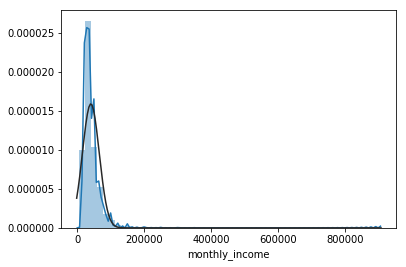

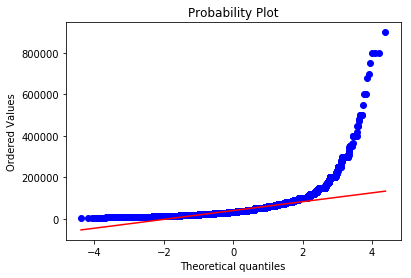

In [99]:
# импортируем библиотеку seaborn, предварительно 
# установив ее в Anaconda Prompt с помощью команды
# conda install -c anaconda seaborn
import seaborn as sns

# импортируем norm и stats
from scipy import stats
from scipy.stats import norm

# строим гистограмму распределения и график
# квантиль-квантиль для переменной monthly_income
sns.distplot(train['monthly_income'], fit=norm)
fig = plt.figure()
res = stats.probplot(train['monthly_income'], plot=plt)

Для распределения, скошенного вправо (положительный коэффициент асимметрии), обычно применяются следующие преобразования: квадратный корень, кубический корень, свернутый корень и логарифм. Для распределения, скошенного влево (отрицательный коэффициент асимметрии), обычно применяются следующие преобразования: квадратный корень (константа – x), кубический корень (константа – x) и логарифм (константа – x). Поскольку логарифм нуля, а равно и любого отрицательного числа, неопределен, перед использованием логарифмического преобразования ко всем значениям нужно добавить константу, чтобы сделать их положительными. При использовании корней обычно корень берут от модуля числа (чтобы не вычислять корни отрицательных чисел) и затем учитывают знак числа.

In [100]:
# вычисляем коэффициент асимметрии
train['monthly_income'].skew()

5.170662523993356

In [101]:
# вычисляем коэффициент эксцесса
train['monthly_income'].kurtosis()

81.08485953358395

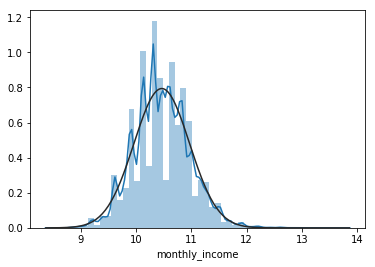

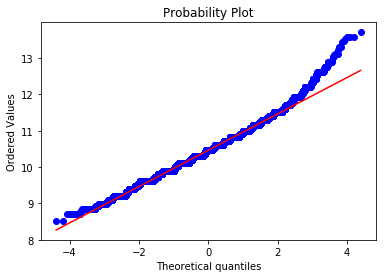

In [102]:
# строим гистограмму распределения и график
# квантиль-квантиль, применив логарифмическое 
# преобразование для переменной monthly_income,
# используем константу a, чтобы не брать
# логарифм нуля
a = 0.001
sns.distplot(np.log(train['monthly_income'] + a), fit=norm)
fig = plt.figure()
res = stats.probplot(np.log(train['monthly_income'] + a), plot=plt)

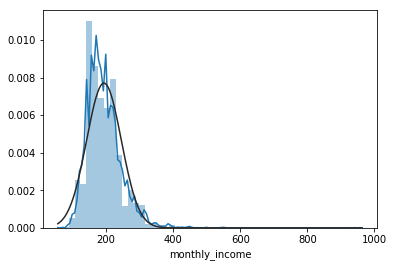

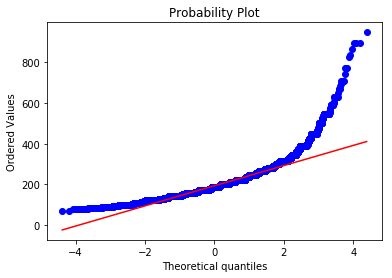

In [103]:
# строим гистограмму распределения и график
# квантиль-квантиль, применив преобразование 
# квадратным корнем для переменной monthly_income,
# используем модуль, чтобы не вычислять корни
# отрицательных чисел, и затем учитываем знак числа

sns.distplot(np.sign(train['monthly_income']) *  
             (train['monthly_income'].abs() ** (1/2)), fit=norm)
fig = plt.figure()
res = stats.probplot(np.sign(train['monthly_income']) * 
                     (train['monthly_income'].abs() ** (1/2)), plot=plt)

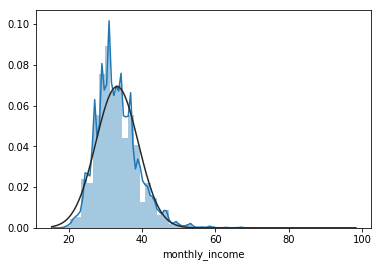

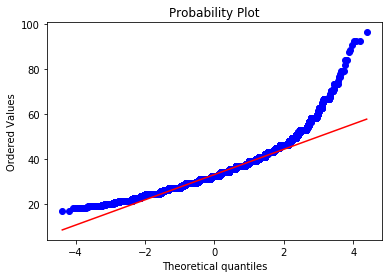

In [104]:
# строим гистограмму распределения и график
# квантиль-квантиль, применив преобразование 
# кубическим корнем для переменной monthly_income,
# используем модуль, чтобы не вычислять корни
# отрицательных чисел, и затем учитываем знак числа
sns.distplot(np.sign(train['monthly_income']) * 
             (train['monthly_income'].abs() ** (1/3)), fit=norm)
fig = plt.figure()
res = stats.probplot(np.sign(train['monthly_income']) * 
                     (train['monthly_income'].abs() ** (1/3)), plot=plt)

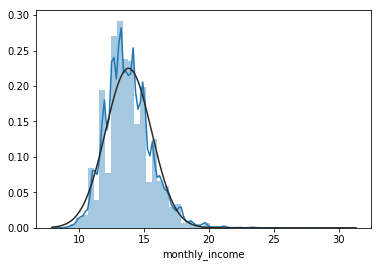

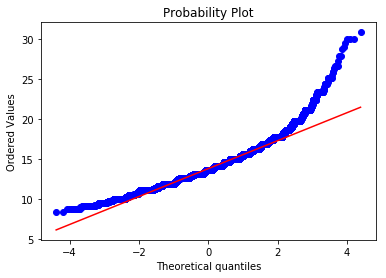

In [105]:
# строим гистограмму распределения и график
# квантиль-квантиль, применив преобразование 
# свернутым корнем для переменной monthly_income, 
# используем модуль, чтобы не вычислять корни 
# отрицательных чисел, и затем учитываем знак числа
sns.distplot(np.sign(train['monthly_income']) * 
             np.sqrt(np.sqrt(train['monthly_income'].abs())), fit=norm)
fig = plt.figure()
res = stats.probplot(np.sign(train['monthly_income']) * 
                     np.sqrt(np.sqrt(train['monthly_income'].abs())), plot=plt)

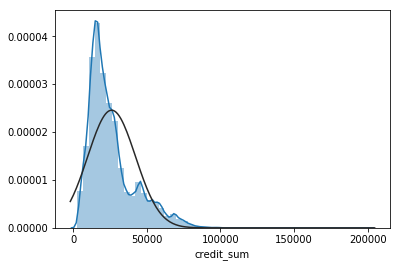

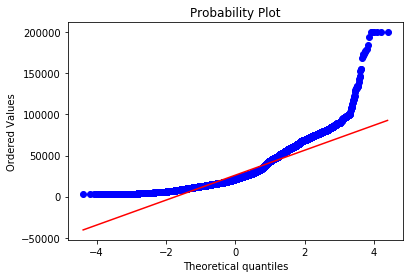

In [106]:
# строим гистограмму распределения и график
# квантиль-квантиль для переменной monthly_income
sns.distplot(train['credit_sum'], fit=norm)
fig = plt.figure()
res = stats.probplot(train['credit_sum'], plot=plt)

In [107]:
# импортируем функцию boxcox
from scipy.stats import boxcox
# выполняем преобразование Бокса-Кокса
transformed, lam = boxcox(train['credit_sum'])
print('Lambda: %f' % lam)

Lambda: 0.038149


Преобразование Бокса-Кокса представляет собой целое семейство преобразований. При lambda = -1 выполняется обратное преобразование. При lambda = -0.5 выполняется преобразование обратного квадратного корня. При lambda = 0.0 выполняется логарифмическое преобразование. При lambda = 0.5 выполняется преобразование квадратного корня. При lambda = 1.0 преобразование не выполняется.

В данном случае наше значение 0.04, будет выполнено логарифмическое преобразование. Давайте построим гистограмму и график Q-Q для переменной, к которой было применено преобразование Бокса-Кокса.

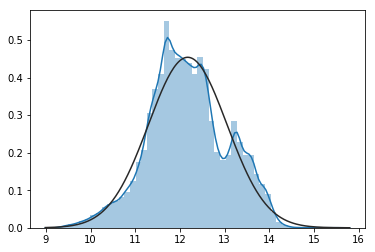

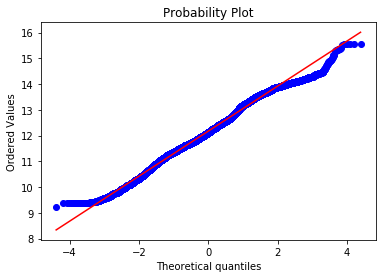

In [108]:
# строим гистограмму распределения и график
# квантиль-квантиль для переменной monthly_income,
# преобразованной с помощью Бокса-Кокса
sns.distplot(transformed, fit=norm)
fig = plt.figure()
res = stats.probplot(transformed, plot=plt)

In [109]:
# выполняем логарифмическое преобразование 
# указанных переменных
train['credit_sum'] = np.log(train['credit_sum'] + a)
train['monthly_income'] = np.log(train['monthly_income'] + a)
train['age'] = np.log(train['age'] + a)

test['credit_sum'] = np.log(test['credit_sum'] + a)
test['monthly_income'] = np.log(test['monthly_income'] + a)
test['age'] = np.log(test['age'] + a)

Для количественных независимых переменных биннинг – это разбивка диапазона значений переменной на интервалы (бины). Например, есть переменная `Возраст` с диапазоном значений от 20 до 70 лет, можно разбить на интервалы: от 18 до 30 лет, от 31 года до 50 лет, от 51 года до 70 лет. В итоге получим категориальную переменную, в которой заданные нами интервалы являются категориями. Для категориальных независимых переменных биннинг – это переназначение (группировка) исходных категорий переменной. Например, есть переменная `Возраст` с категориями от 18 до 25 лет, от 26 до 35 лет, от 36 до 45 лет, от 46 до 55 лет, от 56 до 65 лет. Категории можно укрупнить, из пяти категорий сделать три: от 18 до 35 лет, от 36 до 55 лет, 56 лет и старше. 

Основная причина проведения биннинга – это борьба с нелинейностью при построении скоринговых моделей на основе логистической регрессии. Часто взаимосвязь между непрерывной переменной и событием является нелинейной. Уравнение логистической регрессии, несмотря на то что ее выходное значение подвергается нелинейному преобразованию путем логита, все равно моделирует линейные зависимости между предикторами и зависимой переменной. 

Для иллюстрации можно взять пример с нелинейной зависимостью между возрастом и событием (например, откликом). Допустим, рассчитанный регрессионный коэффициент в уравнении логистической регрессии получился отрицательным. Это значит, что вероятность отклика с возрастом уменьшается. После проведенного биннинга, когда были выделены категории от 18 до 25 лет, от 26 до 35 лет, от 36 до 45 лет и старше 45 лет, оказалось, что зависимость между возрастом и событием нелинейная. Первая (молодые) и последняя (старший возраст) категории склонны к отклику, а промежуточные сегменты, наоборот, не склонны к отклику.

Однако у биннинга имеются и серьезные недостатки. Авторитетный статистик Фрэнк Харрелл приводит ряд причин, по которым не следует проводить биннинг количественных независимых переменных. Основной недостаток – это потеря прогнозной силы переменной в силу снижение ее информативности (вспомним, что наиболее полную информацию несет количественная шкала). Кроме того, в основе биннинга лежит некорректное предположение о том, что зависимость между предиктором и откликом внутри интервалов является монотонной (по мнению Харрелла, это предположение еще менее разумно, чем предположение о линейности). При разбиении всего диапазона значений переменной на интервалы первый и последний интервалы будут очень широкими, потому что плотность распределения в них низкая. Нельзя не отметить и очевидный субъективизм категоризации, выражающийся в том, что если нескольким исследователям предложить категоризировать переменную, они выберут разные границы интервалов. 

В силу недостатков, изложенных ниже, биннинг как инструмент борьбы с нелинейностью используется все реже и уступает место преобразованиям. В то же время биннинг можно с успехом использовать для создания новых переменных, способных улучшить качество модели.

Самый простой вариант биннинга – разбить количественную переменную на определенное количество интервалов, заданных вручную. 

Обратите внимание, что как и в случае с импутацией статистиками, нельзя создать с помощью биннинга новую переменную на общем наборе данных, а потом разбить набор на обучение и контроль и работать с такой переменной в соответствующей выборке, как с обычной исторической переменной. Это обусловлено тем, что для биннинга используется информация о распределении значений переменной по всему набору данных. В результате получится, что в контрольной выборке мы будем использовать переменную, категории которой были получены, исходя из информации всего набора данных. Здесь важно понять, что с помощью биннинга мы на обучающей выборке получаем правила дискретизации (для количественных переменных) и правила перегруппировки (для категориальных переменных), которые применяются к соответствующей переменной в обучающей и контрольной выборках.

In [110]:
# задаем точки, в которых будут находится границы категорий 
# будущей переменной monthcat
bins = [-np.inf, 7.95, 9.6, 11.25, 13.725, 14.55,
        17.85, 20.325, 23.625, 24.45, 26.925, np.inf]
# осуществляем биннинг переменной credit_month и записываем
# результаты в новую переменную monthcat
train['monthcat'] = pd.cut(train['credit_month'], bins).astype('object')
test['monthcat'] = pd.cut(test['credit_month'], bins).astype('object')

Однако нам нужно создать не просто новую переменную, а переменную, обладающую высокой прогнозной силой. Для задачи бинарной классификации эта прогнозная сила выражается в способности отличать отрицательный класс от положительного (проще говоря, отличать одну категорию зависимой переменной от другой). Поэтому при выполнении биннинга ориентируются на два показателя – WoE и IV, которые позволяют судить об этой способности. 
Давайте построим простую таблицу сопряженности между нашей новой переменной `monthcat` и зависимой переменной `open_account_flg`.

In [111]:
# строим таблицу сопряженности monthcat * open_account_flg
biv = pd.crosstab(train['monthcat'], train['open_account_flg'])
biv

open_account_flg,0,1
monthcat,,
"(-inf, 7.95]",7197,2378
"(7.95, 9.6]",928,234
"(9.6, 11.25]",57896,9455
"(11.25, 13.725]",25404,7007
"(13.725, 14.55]",1657,133
"(14.55, 17.85]",331,112
"(17.85, 20.325]",1454,722
"(20.325, 23.625]",21,2
"(23.625, 24.45]",3324,905


Исходя из этой таблицы, мы можем вычислить «вес» каждой категории. 
WoE (от weight of evidence) или вес категории вычисляется по формуле:

$WoE_i = ln(\frac{F_i^0}{F_i^1})$

где:
- $i$ – категория переменной;
- $ln$ – натуральный логарифм;
- $F_i^0$  –  относительная частота отрицательного класса (класса 0);
- $F_i^1$  –  относительная частота положительного класса (класса 1).

Вычислим вручную WoE для категории `(-inf, 7.95]`. Относительная частота класса `0` в этой категории равна 7197 / (7197 + 928 + 57896 + 25404 + 1657 + 331 + 1454 + 21 + 3324 + 9 + 282) или 7197/98503=0.073. Относительная частота класса `1` равна 2378 / (2378 + 234 + 9455 + 7007 + 133 + 112 + 722 + 2 + 905 + 0 + 71) или 2378/21039=0.113. Отношение частот равно 0.073/0.113=0.646. Натуральный логарифм этого отношения ln(0.646)=-0.437. WoE измеряет предсказательную силу каждой категории или сгруппированной категории с точки зрения способности отличать класс `0` от класса `1`. Отрицательные числа обозначают, что отдельно взятая категория выделяет большую пропорцию представителей класса `1`, чем представителей класса `0` (что так и есть, 0.113 против 0.073). 

При работе с WoE, нужно придерживаться нескольких правил:
- необходимо создавать не более 10 категорий;
- пропущенные значения группируются в отдельную категорию;
- каждая категория должна содержать не менее 5% наблюдений; 
- категории не должны содержать нулевого количества событий или не-событий.

WoE, как и процент «плохих», должны в достаточной мере отличаться по группам. Группировка выполняется так, чтобы максимизировать разницу между представителями класса `0` или представителями класса `1`. Одна из целей работы с WoE – выявить и отделить категории, которые хорошо дифференцируют клиентов. Категории со схожими значениями WoE объединяют, потому что такие категории содержат практически одинаковое количество представителей класса `0` и представителей класса `1` и демонстрируют одинаковое «поведение». Несмотря на то, что абсолютное значение WoE важно, разница между WoE групп играет ключевую роль. Чем больше разница между последующими категориями, тем выше прогнозная сила данной переменной.

В идеале WOE непропущенных значений должно быть монотонным, восходя от отрицательных значений к положительным или наоборот, без смены зависимости на обратную. 

Для проверки качества биннинга с помощью WoE строится график значений WoE. Также можно запустить логистическую регрессию с 1 независимой переменной со значениями WoE. Если тангенс угла наклона линии регрессии (попросту говоря, регрессионный коэффициент) не равен 1 или свободный член, определяющий точку пересечения линии регрессии с осью ординат, не равен ln (процент «хороших»/процент «плохих»), то биннинг выполнен некорректно.

Давайте вычислим WOE для каждой категории переменной `monthcat`.

In [112]:
# пишем функцию, которая вычисляет WoE для 
# каждой категории выбранной переменной, 
# при этом используем умножение на 1.0,
# чтобы преобразовать во float и добавляем
# a=0.0001, чтобы избежать деления на 0
def WoE(df, feature, target):
    biv = pd.crosstab(df[feature], df[target].astype('str'))
    a = 0.0001
    WoE = np.log((1.0 * biv['0'] / sum(biv['0']) + a) / (1.0 * biv['1'] / sum(biv['1']) + a))
    return WoE    

In [113]:
# вычисляем WoE для каждой категории переменной monthcat
WoE(train, 'monthcat', 'open_account_flg')

monthcat
(-inf, 7.95]       -0.437
(7.95, 9.6]        -0.165
(9.6, 11.25]        0.267
(11.25, 13.725]    -0.257
(13.725, 14.55]     0.968
(14.55, 17.85]     -0.450
(17.85, 20.325]    -0.841
(20.325, 23.625]    0.473
(23.625, 24.45]    -0.243
(24.45, 26.925]     0.649
(26.925, inf]      -0.160
dtype: float64

Итак, мы категоризировали переменную так, чтобы она максимально эффективно отличала один класс от другого, и могли бы ее подать на вход модели, но надо убедиться в том, насколько она будет полезна по сравнению с остальными переменными. Самый простой вариант - использовать IV (от information value) или информационное значение. Его можно вычислить для отдельной категории и для всей переменной. Информационное значение для категории вычисляется как разность между относительной частотой класса 0 и относительной частотой класса 1 в данной категории, умноженная на натуральный логарифм отношения этих частот.

$IV_i = {(F_i^0 - F_i^1)}{\ln(\frac{F_i^0}{F_i^1})}$

Вычислим вручную IV для категории `(-inf, 7.95]`. Разность между относительными частотами равна 0.073–0.113=-0.04. Информационное значение равно -0.04 x ln(0.646)= -0.04 x (-0.437)=0.018. 
Давайте вычислим IV для каждой категории переменной `monthcat`.

In [114]:
# пишем функцию, которая вычисляет IV для 
# каждой категории выбранной переменной, 
# при этом используем умножение на 1.0,
# чтобы преобразовать во float и добавляем a=0.0001, 
# чтобы избежать деления на 0
def IV_cat(df, feature, target):
    biv = pd.crosstab(df[feature], df[target].astype('str'))
    a = 0.0001
    IV_cat = ((1.0 * biv['0']/sum(biv['0']) + a) - 
              (1.0 * biv['1']/sum(biv['1']) + a)) * np.log((1.0 * biv['0']/sum(biv['0']) + a) 
                                                           / (1.0 * biv['1']/sum(biv['1']) + a))
    return IV_cat

In [115]:
# вычисляем IV для каждой категории переменной monthcat
IV_cat(train, 'monthcat', 'open_account_flg')

monthcat
(-inf, 7.95]       0.018
(7.95, 9.6]        0.000
(9.6, 11.25]       0.037
(11.25, 13.725]    0.019
(13.725, 14.55]    0.010
(14.55, 17.85]     0.001
(17.85, 20.325]    0.016
(20.325, 23.625]   0.000
(23.625, 24.45]    0.002
(24.45, 26.925]    0.000
(26.925, inf]      0.000
dtype: float64

Итоговое информационное значение используется для измерения прогнозной силы переменной в целом, для этого информационные значения, вычисленные по каждой категории, складываются.

$IV = \sum_{i = 1}^k(F_i^0 - F_i^1)ln(\frac{F_i^0}{F_i^1})$

Информационное значение всегда является положительной величиной. При интерпретации итоговых значений IV руководствуются правилом: 
- меньше 0.02 – характеристика не обладает предсказательной способностью;
- от 0.02 до 0.1 – слабая предсказательная способность;
- от 0.1 до 0.3 – средняя предсказательная способность;
- 0.3 и выше – высокая предсказательная способность. 
Значения IV более 0.5 обычно вызывают подозрения («слишком хорошо, чтобы быть правдой») и нуждаются в дополнительной проверке.

Давайте вычиcлим итоговое IV для переменной `monthcat`.

In [116]:
# пишем функцию, которая вычисляет итоговое 
# IV для выбранной переменной, 
# при этом используем умножение на 1.0,
# чтобы преобразовать во float и добавляем a=0.0001, 
# чтобы избежать деления на 0
def IV(df, feature, target):
    biv = pd.crosstab(df[feature], df[target].astype('str'))
    a = 0.0001
    IV = sum(((1.0 * biv['0'] / sum(biv['0']) + a) - 
          (1.0 * biv['1'] / sum(biv['1']) + a)) * np.log((1.0 * biv['0'] / sum(biv['0']) + a) 
                                                  / (1.0 * biv['1'] / sum(biv['1']) + a)))
    return IV

In [117]:
# вычисляем итоговое IV для переменной monthcat
IV(train, 'monthcat', 'open_account_flg')

0.104003366646915

Выше мы брали переменные наугад, однако лучше для биннинга использовать количественные переменные с наибольшим IV. Однако мы не можем напрямую вычислить IV, потому что информационное значение зависит от количества категорий. У нас в начале списка окажутся переменные с большим числом категорий. Аналогично, когда делаем биннинг: если в нашей новой переменной будет много категорий, итоговое информационное значение возрастет, но с практической точки зрения будет бесполезным, потому что будет измерять шум. Поэтому часто делают так: разбивают количественные переменные на одинаковое количество квантилей (обычно используют 10 квантилей) и измеряют IV.

In [118]:
# пишем функцию, вычисляющую IV по всем 
# количественным предикторам
def numeric_IV(df): 
    # создаем список, в который будем записывать IV
    iv_list = []
    # создаем копию датафрейма
    df = df.copy()
    # записываем константу, которую будем добавлять,
    # чтобы избежать деления на 0
    a= 0.0001
    # задаем зависимую переменную
    target = df['open_account_flg'].astype('str')
    # отбираем столбцы, у которых больше 10 уникальных значений
    df = df.loc[:, df.apply(pd.Series.nunique) > 10]
    # из этих столбцов отбираем только количественные
    numerical_columns = df.select_dtypes(include=['number']).columns
    # запускаем цикл, который вычисляет IV по каждой 
    # выбранной переменной
    for var_name in numerical_columns:
        # разбиваем переменную на 10 квантилей
        df[var_name] = pd.qcut(df[var_name].values, 10, duplicates='drop').codes
        # строим таблицу сопряженности между категоризированной 
        # переменной и зависимой переменной
        biv = pd.crosstab(df[var_name], target)        
        # вычисляем IV на основе таблицы сопряженности
        IV = sum(((1.0 * biv['0'] / sum(biv['0']) + a) - (1.0 * biv['1'] / sum(biv['1']) + a)) *
                 np.log((1.0 * biv['0'] / sum(biv['0']) + a) / (1.0 * 
                                                                biv['1'] / sum(biv['1']) + a)))
        # добавляем вычисленное IV в список, где хранятся IV
        iv_list.append(IV)
    # создаем список с названиями столбцов
    col_list = list(numerical_columns)
    # создаем датафрейм с двумя столбцами, в одном - названия переменных,
    # в другом - IV этих переменных
    result = pd.DataFrame({'Название переменной' : col_list,'IV' : iv_list})
    # добавляем дополнительный столбец "Полезность", задаем строковые значения,
    # которые будут выводится в зависимости от величины IV
    result['Полезность'] = ['Подозрительно высокая' if x > 0.5 else 'Сильная' 
                            if x <= 0.5 and x > 0.3 else 'Средняя'
                            if x <= 0.3 and x > 0.1 else 'Слабая' 
                            if x <= 0.1 and x > 0.02 else 'Бесполезная' 
                            for x in result['IV']]  # по Наиму Сиддики
    # возвращаем датафрейм, отсортированный по убыванию IV
    return(result.sort_values(by='IV', ascending=False))

In [119]:
numeric_IV(train)

,Название переменной,IV,Полезность
1,credit_sum,0.066,Слабая
0,age,0.062,Слабая
2,credit_month,0.038,Слабая
3,score_shk,0.021,Слабая
5,credit_count,0.015,Бесполезная
4,monthly_income,0.006,Бесполезная


Очень часто выполняют фильтрацию переменных по итоговым значениям IV, то есть IV используется для удаления наиболее слабых переменных. Однако для отбора наиболее сильных переменных в модель логистической регрессии информационные значения использовать не стоит, потому что выбирать переменные нужно на основании того, как они работают вместе, а не на основании того, как они работают по отдельности. Кроме того, следует помнить, о вышеупомянутом недостатке: информационное значение зависит от количества категорий. Также помните, если WoE сохраняет монотонность как для небольших, так и для крупных категорий, выбирайте более крупные категории.
Очень удобно делать биннинг с учетом WoE и IV с помощью обработчика **Конечные классы** бесплатной программы **Deductor Studio Academic**.

<img src='Data/img/Binning1.png'>

В нижеприведенном окне осуществляем биннинг, включив интерактивный режим (кнопка с изображением линейки-треугольника).

<img src='Data/img/Binning2.png'>


Для отбора наиболее сильных переменных можно воспользоваться важностями предикторов, вычисляемыми с помощью случайного леса. 
В основе расчета важности переменных лежит критерий уменьшения неоднородности в узлах-потомках дерева. 

В деревьях классификации оценивается уменьшение неоднородности распределения категорий зависимой переменной в узлах-потомках. Однородным узлом является узел, в котором все наблюдения относятся к одной и той же категории зависимой переменной, в то время как узел с максимальной неоднородностью содержит равное количество наблюдений во всех категориях зависимой переменной. Для расчета неоднородности в деревьях классификации используется мера Джини.

В деревьях регрессии оценивается уменьшение разброса значений зависимой переменной относительно определенного среднего значения в узлах-потомках. Здесь уже вместо меры Джини используется внутриузловая дисперсия. Если внутриузловую дисперсию трактовать с точки зрения неоднородности, то абсолютно однородным узлом является узел, в котором все наблюдения имеют одинаковые значения зависимой переменной, в то время как узлом с высоким значением неоднородности (в случае количественной зависимой переменной ограничения максимально возможного значения неоднородности не существует) является узел, включающий наблюдения с сильно различающимися значениями зависимой переменной.

Алгоритм вычисления важности предиктора на основе усредненного уменьшения неоднородности выглядит так:

<dd>1. Для каждого дерева случайного леса вычисляем сумму улучшений или уменьшений неоднородности узлов на всех ветвлениях, связанных с данным предиктором. На рисунке показан пример вычисления улучшения.</dd>


<img src='Data/img/Improvement.png'>


<dd>2. Итоговую сумму уменьшений неоднородности, полученную по всем деревьям, усредняем путем деления на общее количество деревьев.</dd>

<dd>3. Вышеописанные шаги повторяем для всех остальных предикторов.<dd>

Наиболее важный предиктор – тот, который дает наибольшее усредненное уменьшение неоднородности (для деревьев классификации – уменьшение меры Джини, для деревьев регрессии – уменьшение суммы квадратов остатков). Нетрудно увидеть и недостаток подхода. По сути важность складывается из частоты использования переменной в качестве предиктора разбиения, то есть чаще наиболее важными будут переменные, по которым можем быть рассмотрено больше вариантов разбиения и у них больше шансов стать предиктором разбиения. Поэтому наиболее важными переменными чаще будут переменные с большим количеством уникальных значений, традиционно это количественные переменные. 

In [120]:
# выполняем дамми-кодирование
train_dum = pd.get_dummies(train)
# создаем обучающий массив меток
y_training = train_dum.loc[:, 'open_account_flg_1']
# удаляем из будущего массива признаков результаты
# дамми-кодирования зависимой переменной -
# open_account_flg_0 и open_account_flg_1
train_dum.drop(['open_account_flg_0', 'open_account_flg_1'], axis=1, inplace=True)
# создаем обучающий массив признаков
X_training = train_dum.loc[:, 'age':'monthcat_(26.925, inf]']
# создаем экземпляр класса RandomForestClassifier
forest = RandomForestClassifier(n_estimators=50, max_depth=17, random_state=152, n_jobs=-1)
# строим модель
forest.fit(X_training, y_training)
# cоздаем объект с названиями предикторов
feat_labels = X_training.columns
# cоздаем объект со значениями важностей, вычисленными моделью forest
importances = forest.feature_importances_
# задаем сортировку значений важности и сопоставляем названия предикторов важностям
indices = np.argsort(importances)[::-1]
for f in range(X_training.shape[1]):
    print('%2d) %-*s %f' % (f + 1, 35,
                            feat_labels[indices[f]],
                            importances[indices[f]]))

 1) tariff_id_1.32                      0.105901
 2) credit_sum                          0.093109
 3) score_shk                           0.082223
 4) age                                 0.072307
 5) monthly_income                      0.050953
 6) ind_1                               0.039978
 7) credit_month                        0.037639
 8) monthcat_(9.6, 11.25]               0.033227
 9) credit_count                        0.029187
10) tariff_id_1.1                       0.028432
11) ind_0                               0.021706
12) education_GRD                       0.019698
13) education_SCH                       0.019187
14) job_position_PNA                    0.018817
15) marital_status_MAR                  0.015158
16) monthcat_(11.25, 13.725]            0.014302
17) tariff_id_1.6                       0.012915
18) marital_status_UNM                  0.012298
19) job_position_SPC                    0.011463
20) gender_M                            0.011354
21) gender_F        

In [121]:
# воспользуемся пакетом CHAID для биннинга
# категориальной переменной tariff_id,
# предварительно установив его в Anaconda Promt 
# с помощью команды pip install CHAID
from CHAID import Tree
# задаем название предиктора
independent_variable = 'tariff_id'
# задаем название зависимой переменной
dep_variable = 'open_account_flg'
# создаем словарь, где ключом будет название
# предиктора, а значением - тип переменной
dct = {independent_variable: 'nominal'}

In [122]:
# строим дерево CHAID и выводим его
tree = Tree.from_pandas_df(train, dct, dep_variable, max_depth=1)
tree.print_tree()

([], {0: 98503.0, 1: 21019.0}, (tariff_id, p=0.0, score=4912.276428995799, groups=[[1.0, 1.9], [1.1, 1.17], [1.16, 1.5, 1.2, 1.7, 1.94], [1.18], [1.19, 1.4], [1.21, 1.22, 1.23, 1.99], [1.24, 1.25, 1.6], [1.3, 1.41, 1.91], [1.32], [1.43, 1.44]]), dof=9))
├── ([1.0, 1.9], {0: 5069.0, 1: 359.0}, <Invalid Chaid Split> - the max depth has been reached)
├── ([1.1, 1.17], {0: 39687.0, 1: 9244.0}, <Invalid Chaid Split> - the max depth has been reached)
├── ([1.16, 1.5, 1.2, 1.7, 1.94], {0: 8504.0, 1: 940.0}, <Invalid Chaid Split> - the max depth has been reached)
├── ([1.18], {0: 2.0, 1: 21.0}, <Invalid Chaid Split> - the minimum parent node size threshold has been reached)
├── ([1.19, 1.4], {0: 8060.0, 1: 1053.0}, <Invalid Chaid Split> - the max depth has been reached)
├── ([1.21, 1.22, 1.23, 1.99], {0: 928.0, 1: 36.0}, <Invalid Chaid Split> - the max depth has been reached)
├── ([1.24, 1.25, 1.6], {0: 23847.0, 1: 3934.0}, <Invalid Chaid Split> - the max depth has been reached)
├── ([1.3, 1.4

In [123]:
# на основе категориальной переменной tariff_id создаем
# количественную переменную tariff
train['tariff']=train['tariff_id'].astype('float')
test['tariff']=test['tariff_id'].astype('float')

# создаем переменную paym, которая 
# является отношением выданной суммы кредита 
# (credit_sum) к сроку кредита (credit_month), 
# то есть ежемесячной суммой кредита
train['paym'] = train['credit_sum'] / train['credit_month']
test['paym'] = test['credit_sum'] / test['credit_month']

# заменяем бесконечные значения на 1
train['paym'].replace([np.inf, -np.inf], 1, inplace=True)
test['paym'].replace([np.inf, -np.inf], 1, inplace=True)

# создаем переменную pti, которая является 
# отношением ежемесячной суммы кредита 
# (paym) к ежемесячному заработку 
# (monthly_income) 
train['pti'] = train['paym'] / train['monthly_income']
test['pti'] = test['paym'] / test['monthly_income']

# заменяем бесконечные значения на 1
train['pti'].replace([np.inf, -np.inf], 1, inplace=True)
test['pti'].replace([np.inf, -np.inf], 1, inplace=True)

# создаем новые переменные, возведя некоторые
# количественные переменные в квадрат
train['tariff_sq'] = train['tariff']**2
test['tariff_sq'] = test['tariff']**2

train['age_sq'] = train['age']**2
test['age_sq'] = test['age']**2

train['credit_sum_sq'] = train['credit_sum']**2
test['credit_sum_sq'] = test['credit_sum']**2

train['score_sq'] = train['score_shk']**2
test['score_sq'] = test['score_shk']**2

train['income_sq'] = train['monthly_income']**2
test['income_sq'] = test['monthly_income']**2

train['credit_month_sq'] = train['credit_month']**2
test['credit_month_sq'] = test['credit_month']**2

train['credit_count_sq'] = train['credit_count']**2
test['credit_count_sq'] = test['credit_count']**2

In [124]:
# пишем функцию, выполняющую биннинг
def user_bin(df, number):    
    # увеличиваем максимальную ширину столбца
    pd.set_option('max_colwidth', 800) 
    # задаем список, где будут хранится IV
    iv_list = []
    # задаем список, где будет хранится информация о количестве бинов
    bins_list = [] 
    # задаем список, где будет хранится информация о бинах
    groups_list = []  
    # записываем константу, которую будем добавлять,
    # чтобы избежать деления на 0
    a = 0.0001
    # задаем зависимую переменную
    target = df['open_account_flg'].astype('str')
    # отбираем столбцы, у которых больше 10 уникальных значений
    df = df.loc[:, df.apply(pd.Series.nunique) > 10]
    # из этих столбцов отбираем только количественные
    numerical_columns = df.select_dtypes(include=['number']).columns    
    # запускаем цикл, который вычисляет IV по каждой 
    # выбранной переменной
    for var_name in numerical_columns:  
        # фиксируем количество бинов
        num = number
        # создаем точки разбиения
        bins = np.linspace(df[var_name].min(), df[var_name].max(), num) 
        # округляем значения точек разбиения
        rounded_bins = np.round(bins, 2)
        # создаем бины
        groups = np.digitize(df[var_name], rounded_bins)
        # строим таблицу сопряженности между категоризированной 
        # переменной и зависимой переменной
        biv = pd.crosstab(groups, target)
        # вычисляем IV на основе таблицы сопряженности        
        IV = sum(((1.0 * biv['0'] / sum(biv['0']) + a) - (1.0 * biv['1'] / sum(biv['1']) + a)) * 
                 np.log((1.0 * biv['0'] / sum(biv['0']) + a) / (1.0 * 
                                                                biv['1'] / sum(biv['1']) + a)))
        # добавляем вычисленное IV в список, где хранятся IV
        iv_list.append(IV) 
        # добавляем информацию о количестве бинов в список, где хранится
        # информация о количестве бинов
        bins_list.append(num)
        # добавляем бины в список, где хранится 
        # информация о бинах
        groups_list.append(rounded_bins)
    # создаем список с названиями столбцов    
    col_list = list(numerical_columns) 
    # создаем датафрейм с четырьмя столбцами, в первом - названия переменных,
    # во втором - бины, в третьем - IV, в четвертом - количество бинов
    result = pd.DataFrame({'Переменная' : col_list, 
                           'Бины': groups_list, 
                           'IV' : iv_list,
                           'Количество_бинов' : bins_list})    
    # возвращаем датафрейм, отсортированный по убыванию IV
    return(result.sort_values(by='IV', ascending=False))

In [125]:
# разбиваем все количественные переменные 
# на 10 категорий и смотрим IV
user_bin(train, 10)

,Переменная,Бины,IV,Количество_бинов
6,tariff,"[1.0, 1.11, 1.22, 1.33, 1.44, 1.55, 1.66, 1.77, 1.88, 1.99]",0.211,10
9,tariff_sq,"[1.0, 1.33, 1.66, 1.99, 2.32, 2.64, 2.97, 3.3, 3.63, 3.96]",0.146,10
2,credit_month,"[3.0, 6.67, 10.33, 14.0, 17.67, 21.33, 25.0, 28.67, 32.33, 36.0]",0.093,10
10,age_sq,"[8.35, 9.45, 10.54, 11.63, 12.72, 13.81, 14.9, 15.99, 17.08, 18.17]",0.080,10
0,age,"[2.89, 3.04, 3.2, 3.35, 3.5, 3.65, 3.81, 3.96, 4.11, 4.26]",0.076,10
1,credit_sum,"[7.91, 8.39, 8.87, 9.34, 9.82, 10.3, 10.78, 11.25, 11.73, 12.21]",0.065,10
7,paym,"[0.24, 0.65, 1.05, 1.46, 1.87, 2.27, 2.68, 3.09, 3.49, 3.9]",0.062,10
11,credit_sum_sq,"[62.64, 72.23, 81.82, 91.42, 101.01, 110.61, 120.2, 129.8, 139.39, 148.99]",0.060,10
8,pti,"[0.02, 0.06, 0.1, 0.15, 0.19, 0.23, 0.27, 0.31, 0.35, 0.39]",0.037,10
12,score_sq,"[0.0, 0.14, 0.28, 0.42, 0.57, 0.71, 0.85, 0.99, 1.13, 1.27]",0.023,10


In [126]:
# задаем точки, в которых будут находится границы категорий 
# будущей переменной agecat
bins = [-np.inf, 3.09, 3.28, 3.48, 3.67, 3.87, 4.07, np.inf]
# осуществляем биннинг переменной age и записываем
# результаты в новую переменную agecat
train['agecat'] = pd.cut(train['age'], bins).astype('object')
test['agecat'] = pd.cut(test['age'], bins).astype('object')

In [127]:
# задаем точки, в которых будут находится границы категорий 
# будущей переменной credsumcat
bins = [-np.inf, 8.3, 8.69, 9.08, 9.47, 9.87, 10.26, 
        10.65, 11.04, 11.43, 11.82, np.inf]
# осуществляем биннинг переменной credit_sum и записываем
# результаты в новую переменную credsumcat
train['credsumcat'] = pd.cut(train['credit_sum'], bins).astype('object')
test['credsumcat'] = pd.cut(test['credit_sum'], bins).astype('object')

In [128]:
# задаем точки, в которых будут находится границы категорий
# будущей переменной paymcat
bins = [-np.inf, 0.57, 0.91, 1.24, 1.57, 1.9, 2.24, 
        2.57, 2.9, 3.23, 3.57, np.inf]
# осуществляем биннинг переменной paym и записываем
# результаты в новую переменную paymcat
train['paymcat'] = pd.cut(train['paym'], bins).astype('object')
test['paymcat'] = pd.cut(test['paym'], bins).astype('object')

In [129]:
# создаем переменную match, если количество просроченных
# кредитов совпадает с количеством кредитов, переменная
# принимает значение 1, если не совпадает, принимает значение 0
train['match'] = np.where(train['overdue_credit_count'] == train['credit_count'], 
                          1, 0).astype('object')
test['match'] = np.where(test['overdue_credit_count'] == test['credit_count'], 
                         1, 0).astype('object')

Важнейшей предпосылкой регрессионного анализа является единый масштаб измерения переменных. Давайте отмасштабируем переменные. Самое простое масштабирование подразумевает, что из каждого значения переменной мы вычтем среднее значение и полученный результат разделим на стандартное отклонение:

$$\frac{\Large x_i - mean(x)}{\Large stdev(x)}$$

Еще мы можем из каждого значения переменной вычесть минимальное значение и полученный результат разделить на ширину диапазона (разницу между минимальным и максимальным значениями):

$$\frac{\Large x_i - min(x)}{\Large max(x)-min(x)}$$

В итоге мы сжимаем значения переменных в диапазон от 0 до 1 (или от -1 до 1, если есть отрицательные значения). Если распределение не является нормальным или стандартное отклонение является очень маленьким, этот способ сработает лучше.

Данные виды стандартизации чувствительны к выбросам, поэтому если данные содержат выбросы, стандартизация с использованием межквартильного размаха может дать лучший результат. Вместо ширины диапазона используется межквартильный размах. В основе выполняемого преобразования лежит следующая формула:

$$\frac{\Large x_i - Q_1(x)}{\Large Q_3(x)-Q_1(x)}$$

In [130]:
# выделяем количественные переменные в отдельный список
num_cols = [c for c in train.columns if train[c].dtype.name != 'object']
# создаем копию обучающего набора
train_copy = train.copy()
# выполняем стандартизацию
for i in num_cols:    
    train[i] = (train[i] - train[i].mean()) / train[i].std()
    test[i] = (test[i] - train_copy[i].mean()) / train_copy[i].std()

In [131]:
# убеждаемся в отсутствии пропусков в переменных
print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119522 entries, 53397 to 149270
Data columns (total 30 columns):
gender                  119522 non-null object
age                     119522 non-null float64
marital_status          119522 non-null object
job_position            119522 non-null object
credit_sum              119522 non-null float64
credit_month            119522 non-null float64
tariff_id               119522 non-null object
score_shk               119522 non-null float64
education               119522 non-null object
living_region           119522 non-null object
monthly_income          119522 non-null float64
credit_count            119522 non-null float64
overdue_credit_count    119522 non-null float64
open_account_flg        119522 non-null object
ind                     119522 non-null object
monthcat                119522 non-null object
tariff                  119522 non-null float64
paym                    119522 non-null float64
pti                     119522

In [132]:
# печатаем названия столбцов до и после
# дамми-кодирования
print("Исходные переменные:\n", list(train.columns), "\n")
train_dumm = pd.get_dummies(train)
print("Переменные после get_dummies:\n", list(train_dumm.columns))

print("Исходные переменные:\n", list(test.columns), "\n")
test_dumm = pd.get_dummies(test)
print("Переменные после get_dummies:\n", list(test_dumm.columns))

Исходные переменные:
 ['gender', 'age', 'marital_status', 'job_position', 'credit_sum', 'credit_month', 'tariff_id', 'score_shk', 'education', 'living_region', 'monthly_income', 'credit_count', 'overdue_credit_count', 'open_account_flg', 'ind', 'monthcat', 'tariff', 'paym', 'pti', 'tariff_sq', 'age_sq', 'credit_sum_sq', 'score_sq', 'income_sq', 'credit_month_sq', 'credit_count_sq', 'agecat', 'credsumcat', 'paymcat', 'match'] 

Переменные после get_dummies:
 ['age', 'credit_sum', 'credit_month', 'score_shk', 'monthly_income', 'credit_count', 'overdue_credit_count', 'tariff', 'paym', 'pti', 'tariff_sq', 'age_sq', 'credit_sum_sq', 'score_sq', 'income_sq', 'credit_month_sq', 'credit_count_sq', 'gender_F', 'gender_M', 'marital_status_CIV', 'marital_status_DIV', 'marital_status_MAR', 'marital_status_UNM', 'marital_status_WID', 'job_position_ATP', 'job_position_BIS', 'job_position_BIU', 'job_position_DIR', 'job_position_INP', 'job_position_NOR', 'job_position_OTHER', 'job_position_PNA', 'job_

In [133]:
# создаем обучающий и контрольный массивы меток
y_tr = train_dumm.loc[:, 'open_account_flg_1']
y_tst = test_dumm.loc[:, 'open_account_flg_1']
# удаляем из будущих массивов признаков результаты
# дамми-кодирования зависимой переменной -
# open_account_flg_0 и open_account_flg_1
train_dumm.drop(['open_account_flg_0', 'open_account_flg_1'], axis=1, inplace=True)
test_dumm.drop(['open_account_flg_0', 'open_account_flg_1'], axis=1, inplace=True)
# создаем обучающий и контрольный массивы признаков
X_tr = train_dumm.loc[:, 'age':'paymcat_(3.57, inf]']
X_tst = test_dumm.loc[:, 'age':'paymcat_(3.57, inf]']

In [134]:
# строим модель логистической регрессии
logreg = LogisticRegression().fit(X_tr, y_tr)
print("AUC на обучающей выборке: {:.3f}".
      format(roc_auc_score(y_tr, logreg.predict_proba(X_tr)[:, 1])))
print("AUC на контрольной выборке: {:.3f}".
      format(roc_auc_score(y_tst, logreg.predict_proba(X_tst)[:, 1])))

AUC на обучающей выборке: 0.758
AUC на контрольной выборке: 0.759


In [135]:
# запишем коэффициенты, предварительно округлив до 3-го знака, 
# и названия предикторов в отдельные объекты
coef = np.round(logreg.coef_, 3)
feat_labels = X_tr.columns

# запишем свободный член (константу) в отдельный объект, при этом
# переводим массив, полученный с помощью атрибута intercept_, 
# в скаляр с округлением до 3-го знака
intercept = np.round(np.asscalar(logreg.intercept_), 3)

# печатаем название "Константа"    
print("Константа:", intercept)
# печатаем название "Регрессионные коэффициенты"
print("Регрессионные коэффициенты:")
# для удобства сопоставим каждому названию 
# предиктора соответствующий коэффициент
for c, feature in zip(coef[0], feat_labels):
    print(feature, c)

Константа: -0.157
Регрессионные коэффициенты:
age -2.077
credit_sum -1.695
credit_month 0.494
score_shk -0.424
monthly_income -0.402
credit_count 0.102
overdue_credit_count 0.043
tariff -0.115
paym 0.291
pti -0.249
tariff_sq -0.079
age_sq 1.937
credit_sum_sq 1.471
score_sq 0.684
income_sq 0.38
credit_month_sq -0.381
credit_count_sq 0.022
gender_F -0.22
gender_M 0.062
marital_status_CIV 0.066
marital_status_DIV 0.022
marital_status_MAR -0.258
marital_status_UNM -0.017
marital_status_WID 0.029
job_position_ATP 0.065
job_position_BIS -0.301
job_position_BIU 0.253
job_position_DIR -0.339
job_position_INP 0.128
job_position_NOR 0.362
job_position_OTHER 0.378
job_position_PNA 0.692
job_position_PNI 0.352
job_position_SPC -0.411
job_position_UMN -0.219
job_position_WOI -0.15
job_position_WRK -0.606
job_position_WRP -0.362
tariff_id_1.0 -1.078
tariff_id_1.1 0.006
tariff_id_1.16 0.215
tariff_id_1.17 0.032
tariff_id_1.18 3.206
tariff_id_1.19 0.304
tariff_id_1.2 -0.39
tariff_id_1.21 -1.139
tariff

In [136]:
# вычислим экспоненциальные коэффициенты
# и запишем их в отдельный объект
exp_coef = np.round(np.exp(coef), 3)

# печатаем название "Константа"    
print("Константа:", intercept)
# печатаем название "Экспонециальные коэффициенты"
print("Экспоненциальные коэффициенты:")
# для удобства сопоставим каждому названию 
# предиктора соответствующий коэффициент
for c, feature in zip(exp_coef[0], feat_labels):
    print(feature, c)

Константа: -0.157
Экспоненциальные коэффициенты:
age 0.125
credit_sum 0.184
credit_month 1.639
score_shk 0.654
monthly_income 0.669
credit_count 1.107
overdue_credit_count 1.044
tariff 0.891
paym 1.338
pti 0.78
tariff_sq 0.924
age_sq 6.938
credit_sum_sq 4.354
score_sq 1.982
income_sq 1.462
credit_month_sq 0.683
credit_count_sq 1.022
gender_F 0.803
gender_M 1.064
marital_status_CIV 1.068
marital_status_DIV 1.022
marital_status_MAR 0.773
marital_status_UNM 0.983
marital_status_WID 1.029
job_position_ATP 1.067
job_position_BIS 0.74
job_position_BIU 1.288
job_position_DIR 0.712
job_position_INP 1.137
job_position_NOR 1.436
job_position_OTHER 1.459
job_position_PNA 1.998
job_position_PNI 1.422
job_position_SPC 0.663
job_position_UMN 0.803
job_position_WOI 0.861
job_position_WRK 0.546
job_position_WRP 0.696
tariff_id_1.0 0.34
tariff_id_1.1 1.006
tariff_id_1.16 1.24
tariff_id_1.17 1.033
tariff_id_1.18 24.68
tariff_id_1.19 1.355
tariff_id_1.2 0.677
tariff_id_1.21 0.32
tariff_id_1.22 0.41
tarif

Третьей важнейшей предпосылкой построения регрессионной модели является отсутствие взаимосвязи между предикторами.
Наличие сильной корреляционной взаимосвязи между предикторами (на уровне 0,7 и выше) называется мультиколлинеарностью.
Мультиколлинеарность в модели проявляется в следующем:
- сильный разброс оценок коэффициентов регрессии;
- большие положительные и большие отрицательные оценки коэффициентов регрессии, выше 1,0 по модулю.
- резкое изменение оценок коэффициентов регрессии при добавлении или удалении предиктора;
- неправильный знак перед коэффициентом регрессии (например, объем продаж по уравнению регрессии увеличивается при увеличении цены);
- присутствие в модели большого количества статистически незначимых оценок коэффициентов регрессии.

Для устранения мультиколлинеарности можно увеличить размер выборки (не всегда реально), выполнить анализ главных компонент или снизить разброс оценок коэффициентов регрессии с помощью методов регуляризации (упорядочения) регрессии.
Методы регуляризации сокращают вариабельность оценок коэффициентов регрессии путем сжимания оценок до близких к нулю
значений.
Как и в обычной логистической регрессии, в методах регуляризации максимизируется правдоподобие, но с дополнительным ограничением на оценки коэффициентов регрессии. Вводится штраф за слишком большие оценки коэффициентов регрессии. 
В методе лассо штрафной член представляет собой произведение штрафного коэффициента на сумму модулей коэффициентов регрессии. Метод лассо называют также L1-регуляризацией.

<img src='Data/img/L1.png'>


В методе гребневой регрессии штрафной член представляет собой произведение штрафного коэффициента на сумму квадратов коэффициентов регрессии. Метод гребневой регрессии называют также L2-регуляризацией.

<img src='Data/img/L2.png'>


Метод лассо устанавливает некоторые оценки коэффициентов регрессии точно в нуле и тем самым осуществляет отбор переменных. Давайте воспользуемся этим свойством.

# Настройка гиперпараметров логистической регрессии с помощью класса GridSearchCV

### `Класс LogisticRegression`

- **`penalty`** – задает тип регуляризации. Значение `l1` соответствует l1-регуляризации (лассо), значение `l2` соответствует l2-регуляризации (гребневой регрессии). Оптимизаторы `newton-cg`, `sag` и `lbfgs` поддерживают только `l2`. По умолчанию используется значение `l2`;
- **`C`** – задает силу регуляризации (чем больше значение, тем меньше сила регуляризации). По умолчанию используется значение `1`;
- **`tol`** – задает допуск сходимости. По умолчанию используется значение 1e-4;
- **`solver`** – задает оптимизатор. Возможные значения: `newton-cg`, `lbfgs`, `liblinear`, `sag`, `saga`. По умолчанию используется значение `liblinear`. При работе с небольшими наборами данными хорошим выбором может быть значение `liblinear`, тогда как при работе с большими наборами данных более быстрыми будут `sag` и `saga`. Оптимизаторы `newton-cg`, `lbfgs` и `sag` работают только с l2-регуляризацией, тогда как `liblinear` и `saga` работают только с l1-регуляризацией;
- **`max_iter`** – задает максимальное количество итераций для оптимизации. По умолчанию используется значение 100;
- **`class_weight`** – задает веса классов, например, `{0:0.67, 1:0.33}`. По умолчанию все классы имеют вес 1.

Мы можем строить модели с разными значениями параметра `C` на обучающей выборке, а проверять их качество на контрольной выборке. Проблема такого подхода заключается в том, что мы используем контрольную выборку и для настройки параметров (в данном случае – значений параметра `C`) и для оценки качества модели. Мы просто будем настраивать нашу модель под контрольную выборку, ведь любой выбор, сделанный, исходя из метрики на контрольном наборе, «сливает» модели информацию контрольного набора. В итоге мы можем получить оптимистичные результаты. Поэтому важно иметь отдельный тестовый набор, который не использовался для обучения, настройки гиперпараметров и применяется однократно лишь для итоговой оценки.
Один из способов решения этой проблемы заключается в том, чтобы разбить данные на три набора: обучающий набор для построения модели, контрольный (валидационный) набор для выбора параметров модели, а также тестовый набор для оценки качества работы выбранных параметров. Кроме того, можно воспользоваться комбинированной проверкой, которая сочетает случайное разбиение на обучающий и тестовый наборы и перекрестную проверку.
В рамках этого метода набор данных сначала разбивается на обучающую и тестовую выборки. В нашем случае уже есть обучающая и тестовая выборки. На обучающей выборке запускается перекрестная проверка. Например, при 5-блочной перекрестной проверке исходная обучающая выборка будет разбита на 5 блоков приблизительно равного объема, а затем 5 раз на четырех блоках будет выполнено обучение модели, а пятый, контрольный блок будет использован для проверки. Например, на первом проходе модель будет обучаться на блоках 1-4, а проверяться на блоке 5. На втором проходе модель будет обучаться на блоках 1-3 и 5, а проверяться на блоке 4. Затем вычисляется среднее значение метрики качества, полученное на 5 контрольных блоках перекрестной проверки.
Допустим, метрикой качества является AUC, у нас 10 значений гиперпараметра `C` и мы задали 5-блочную перекрестную проверку. Для каждого значения гиперпараметра `C` будет построено 5 моделей и среднее значение AUC будет рассчитано на основе 5 моделей, всего будет построено 50 моделей. В итоге выбирается такое значение гиперпараметра, которое дает наибольшее значение AUC, усредненное по контрольным блокам перекрестной проверки. Модель с этим значением гиперпараметра подгоняется на исходной обучающей выборке и проверяется на тестовой выборке.



### Схема работы решетчатого поиска с комбинированной проверкой


<img src='Data/img/Grid.png'>

In [137]:
# импортируем класс GridSearchCV
from sklearn.model_selection import GridSearchCV
# создаем экземпляр класса LogisticRegression,
# логистическую регрессию с L1-регуляризацией
logreg_grid = LogisticRegression(penalty='l1')
# задаем сетку параметров, будем перебирать 
# разные значения штрафа
param_grid = {'C': [0.6, 0.7, 0.8]}
# задаем стратегию перекрестной проверки
stratcv = StratifiedKFold(n_splits=3)
# создаем экземпляр класса GridSearchCV
grid_search = GridSearchCV(logreg_grid, param_grid, 
                           scoring='roc_auc', 
                           n_jobs=-1, cv=stratcv)
# запускаем решетчатый поиск
grid_search.fit(X_tr, y_tr)
# проверяем модель со значением параметра, дающим наибольшее
# значение AUC (усредненное по контрольным блокам перекрестной
# проверки), на тестовой выборке
test_score = roc_auc_score(y_tst, grid_search.predict_proba(X_tst)[:, 1])
# смотрим результаты решетчатого поиска
print("AUC на тестовой выборке: {:.3f}".format(test_score))
print("Наилучшее значение гиперпараметра C: {}".format(grid_search.best_params_))
print("Наилучшее значение AUC: {:.3f}".format(grid_search.best_score_))

AUC на тестовой выборке: 0.759
Наилучшее значение гиперпараметра C: {'C': 0.8}
Наилучшее значение AUC: 0.755


# Построение логистической регрессии в библиотеке H2O

In [138]:
# перед импортом библиотеки h2o и модуля os убедитесь, что библиотека h2o установлена 
# (сначала установите Java SE Development Kit 8, обратите внимание, 
# 9-я версия H2O не поддерживается, а затем после установки Java 
# запустите Anaconda Prompt и установите h2o с помощью 
# строки pip install h2o)
import h2o
import os
h2o.init(nthreads = -1, max_mem_size = 8)

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.161-b12, mixed mode)
  Starting server from C:\Anaconda3\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\Gewissta\AppData\Local\Temp\tmpssx8gvnw
  JVM stdout: C:\Users\Gewissta\AppData\Local\Temp\tmpssx8gvnw\h2o_Gewissta_started_from_python.out
  JVM stderr: C:\Users\Gewissta\AppData\Local\Temp\tmpssx8gvnw\h2o_Gewissta_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,02 secs
H2O cluster timezone:,Europe/Moscow
H2O data parsing timezone:,UTC
H2O cluster version:,3.18.0.11
H2O cluster version age:,3 months and 9 days !!!
H2O cluster name:,H2O_from_python_Gewissta_77hsqi
H2O cluster total nodes:,1
H2O cluster free memory:,7.111 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"


In [139]:
# импортируем библиотеку для транслитерации
import cyrtranslit

In [140]:
# выполняем транслитерацию
train['living_region'] = train['living_region'].apply(lambda x: \
                                                      cyrtranslit.to_latin(x, 'ru'))
test['living_region'] = test['living_region'].apply(lambda x: \
                                                    cyrtranslit.to_latin(x, 'ru'))

In [141]:
# смотрим результаты транслитерации
print(train['living_region'].unique())
print(test['living_region'].unique())

['AMURSKAJA' "STAVROPOL'SKIJ" 'ROSTOVSKAJA' 'HAKASIJA' 'CHELJABINSKAJA'
 'SAHA/JAKUTIJA/' 'TATARSTAN' 'KARELIJA' 'KEMEROVSKAJA' 'NIZHEGORODSKAJA'
 'VOLGOGRADSKAJA' 'PRIMORSKIJ' 'KABARDINO-BALKARSKAJA' 'KRASNOJARSKIJ'
 'BASHKORTOSTAN' 'CHUVASHSKAJA' 'TVERSKAJA' 'RJAZANSKAJA' 'MOSKVA'
 'MOSKOVSKAJA' 'IRKUTSKAJA' 'SAMARSKAJA' 'OMSKAJA' 'VORONEZHSKAJA'
 'JAMALO-NENECKIJ' 'PERMSKIJ' 'SVERDLOVSKAJA' 'LENINGRADSKAJA'
 'KRASNODARSKIJ' 'PENZENSKAJA' 'HABAROVSKIJ' "TUL'SKAJA" 'SANKT-PETERBURG'
 'SARATOVSKAJA' 'HANTY-MANSIJSKIJ' 'KURGANSKAJA' 'KOMI' 'MURMANSKAJA'
 'KALUZHSKAJA' 'ORLOVSKAJA' 'KAMCHATSKIJ' "ZABAJKAL'SKIJ" 'NOVOSIBIRSKAJA'
 'TJUMENSKAJA' 'ORENBURGSKAJA' 'VOLOGODSKAJA' 'BELGORODSKAJA'
 'MAGADANSKAJA' 'KURSKAJA' 'MORDOVIJA' 'ADYGEJA' 'ASTRAHANSKAJA'
 'ALTAJSKIJ' 'JAROSLAVSKAJA' 'VLADIMIRSKAJA' 'MARIJEHL' 'TOMSKAJA'
 "ARHANGEL'SKAJA" 'IVANOVSKAJA' 'SAHALINSKAJA' 'EVREJSKAJA' 'BURJATIJA'
 'TAMBOVSKAJA' "UL'JANOVSKAJA" 'TYVA' 'KALININGRADSKAJA' 'KALMYKIJA'
 'UDMURTSKAJA' 'KOSTROMSKAJA' '

In [142]:
# в категориях переменной tariff_id заменяем 
# точки на символы подчеркивания 
train['tariff_id'] = train['tariff_id'].astype('str').str.replace('.', '_')
test['tariff_id'] = test['tariff_id'].astype('str').str.replace('.', '_')

# в указанных переменных заменяем 
# значения 0 и 1 на No и Yes
for i in ['open_account_flg', 'ind', 'match']:
    train[i] = np.where(train[i] == 0, 'No', 'Yes')
    test[i] = np.where(test[i] == 0, 'No', 'Yes')

In [143]:
# преобразовываем датафреймы pandas во фреймы h2o -
# специальную структуру данных, используемую h2o
tr = h2o.H2OFrame(train)
valid = h2o.H2OFrame(test)

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [144]:
# взглянем на обучающий фрейм, обратите внимание, сейчас 
# метод .describe() - это метод h2o, а не pandas
tr.describe()

Rows:119522
Cols:30




,gender,age,marital_status,job_position,credit_sum,credit_month,tariff_id,score_shk,education,living_region,monthly_income,credit_count,overdue_credit_count,open_account_flg,ind,monthcat,tariff,paym,pti,tariff_sq,age_sq,credit_sum_sq,score_sq,income_sq,credit_month_sq,credit_count_sq,agecat,credsumcat,paymcat,match
type,enum,real,enum,enum,real,real,enum,real,enum,enum,real,real,real,enum,enum,enum,real,real,real,real,real,real,real,real,real,real,enum,enum,enum,enum
mins,,-2.3725471873521573,,,-3.4612087704028807,-2.267902147056745,,-3.783271294917337,,,-3.879036011883594,-1.212835442622099,-0.21026660601088176,,,,-1.3751016951373043,-2.3949873527650127,-2.4167959380648556,-1.2298366059914692,-2.171095554515055,-3.1348183472454503,-1.9349762639774313,-3.517701923775446,-1.079298796394926,-0.5765439567673392,,,,
mean,,-1.614167116338155e-12,,,6.698536684700914e-14,2.3993494766886133e-16,,1.323747739306094e-13,,,5.488336435366848e-12,-6.797958688288973e-17,2.2828300273746965e-17,,,,-8.432086656371177e-12,-4.8411691036781767e-14,-5.737988391724107e-15,2.1363643662027194e-12,2.127263483826919e-12,7.675801951732351e-14,-5.450494485151606e-14,-3.760055996343109e-12,3.400465561610225e-17,4.85101380817123e-17,,,,
maxs,,2.5131345688897175,,,3.687277417703042,7.114561232323337,,5.304118167107791,,,6.459151180062296,10.916591801772334,14.426591450851443,,,,2.8194380437970143,9.376309750717336,10.050874894134353,3.2637213492316604,2.6997967032450445,4.070198375057461,8.499961438110798,7.385475375851838,10.135641480198448,33.751340758863684,,,,
sigma,,0.9999999999999732,,,0.9999999999999912,1.000000000000485,,1.000000000000008,,,1.0000000000002462,0.999999999999859,1.0000000000000036,,,,0.9999999999999628,0.9999999999999979,1.0000000000000049,1.000000000000472,0.9999999999998972,0.9999999999999859,1.0000000000000104,1.0000000000004436,0.9999999999993934,1.0000000000001656,,,,
zeros,,0,,,0,0,,0,,,0,0,0,,,,0,0,0,0,0,0,0,0,0,0,,,,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,M,-0.7995604182457782,UNM,SPC,0.7151405451638057,-0.2776826423397579,1_4,-0.3090467213461932,SCH,AMURSKAJA,0.05098281289389728,-0.057651895536914785,-0.21026660601088176,No,No,"(9.6, 11.25]",0.31966183574524826,0.1822136100561323,0.16907669047860174,0.22748430783380796,-0.8068597969954864,0.7012396982514135,-0.4097743071988127,0.026862394156739987,-0.2863232212822631,-0.2651799230654705,"(3.28, 3.48]","(10.26, 10.65]","(0.91, 1.24]",No
1,M,0.287656587111897,UNM,SPC,0.12146407959376196,-0.2776826423397579,1_32,-0.8960953135161986,GRD,STAVROPOL'SKIJ,0.4952190931714239,-0.057651895536914785,-0.21026660601088176,No,No,"(9.6, 11.25]",-0.01929087043126168,0.06746899300023682,-0.012103898847136628,-0.10284176596658762,0.24929505164318405,0.09196721089437047,-0.8816616966314432,0.4738418854167575,-0.2863232212822631,-0.2651799230654705,"(3.48, 3.67]","(9.87, 10.26]","(0.91, 1.24]",No
2,F,-1.203029345079497,MAR,SPC,1.0061696655738412,3.702756367094216,1_5,1.1577290766320818,GRD,ROSTOVSKAJA,0.7049717992944416,2.2527151986334535,-0.21026660601088176,No,No,"(23.625, 24.45]",0.7433527184658869,-1.7514292048569862,-1.796362509698879,0.6677166672185276,-1.1752565538302249,1.0076579232724272,1.1499255885847266,0.688159249399901,3.861549017768589,2.225732346549479,"(3.09, 3.28]","(10.26, 10.65]","(-inf, 0.57]",No


In [145]:
# задаем название зависимой переменной
dependent = 'open_account_flg'
# задаем список названий предикторов
predictors = list(tr.columns)
# удаляем название зависимой переменной из 
# списка названий предикторов
predictors.remove(dependent)

In [146]:
# импортируем класс H2OGeneralizedLinearEstimator
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

### `Параметры класса H2OGeneralizedLinearEstimator`

- **`family`** – вид распределения целевой переменной (аналогичный параметр для градиентного бустинга или глубокого обучения называется `distribution`). Возможные варианты для регрессии: `'gaussian'`, `'poisson'`, `'gamma'`, `'tweedie'`. Для биномиальной классификации (логистической регрессии) нужно задать значение `'binomial'`, а для многоклассовой классификации – `'multinomial'`;
- **`link`** – задает связующую функцию, возможные значения: `'family_default'`, `'identity'`, `'logit'`, `'log'`, `'inverse'`, `'tweedie'`;
- **`alpha`** - задает тип регуляризации. Значение `1` соответствует l1-регуляризации (лассо), значение `0` соответствует l2-регуляризации (гребневой регрессии), промежуточное значение соответствует комбинации штрафов l1 и l2 (эластичной сети);
- **`lambda`** - задает силу регуляризации, значение `0` соответствует отсутствию регуляризации и параметр `alpha` игнорируется;
- **`lambda_search`** - если задан данный параметр, GLM будет вычислять модели по полному пути регуляризации. Путь регуляризации начинается с максимального значения `lambda` и двигается к минимальному значению, уменьшая силу регуляризации на каждом шаге. Значения `lambda` задаются в логарифмической шкале. Возвращенная модель будет иметь коэффициенты, соответствующие "оптимальному" значению `lambda`, выясненному в ходе обучения. Когда задано значение `alpha>0`, перебор значений `lambda` можно использовать для эффективной обработки наборов с большим количеством предикторов, поскольку это позволяет удаляеть бесполезные (шумовые) предикторы и строить модели лишь для небольшого поднабора предикторов. Возможное применение перебора значений `lambda` может быть следующим: запускаете его на наборе с большим количеством предикторов, но при этом ограничиваете количество активных предикторов относительно небольшим значением;
- **`lambda_min_ratio`** – задает минимальное значение `lambda`, заданное как процент от начального (максимального) значения. По умолчанию этот параметр равен `0.0001`. Например, если начальное значение `lambda` составляло `15`, то параметр `lambda_min_ratio` будет равен `0.0015`. Значение `0` никогда не проверяется в ходе автоматического поиска, так что при необходимости такое значение
следует задавать вручную;
- **`nlambdas`** – задает количество проверяемых значений параметра `lambda`. По умолчанию равно `–1`, это означает, что будет проверено 100 значений `lambda` при `alpha = 1` (гребневой регрессии) и 30 значений `lambda` при `alpha = 0` (лассо-регрессии). Можно задать меньшее значение для экономии времени;
- **`max_active_predictors`** - ограничивает количество активных предикторов. Значение по умолчанию равно `–1`, что означает отсутствие ограничений, но можно задать и другое значение для ранней остановки lambda_search при достижении заданного количества ненулевых коэффициентов;
- **`solver`** - задает оптимизатор, возможные значения: `'AUTO'`, `'IRLSM'`, `'L_BFGS'`, `'COORDINATE_DESCENT'`, `'COORDINATE_DESCENT_NAIVE'`. `'AUTO'` - алгоритм выбирается на основе используемых данных и других параметров. `'IRLSM'` – метод наименьших квадратов с итеративным пересчётом весов (iterative re-weighted least qquares method). Оптимальный вариант для относительно небольших объемов данных (до 500 переменных, хотя объем в основном ограничен количеством доступной памяти). Для большего количества переменных можно применять IRLSM при использовании регуляризации с большими значениями `alpha`, чтобы получить большое количество нулевых коэффициентов. `'L_BFGS'` – L означает «ограниченная память» (limited memory), а BFGS – алгоритм Бройдена–Флетчера–Гольдфарба–Шанно (Broyden–Fletcher–Goldfarb–Shanno algorithm). Википедия (https://en.wikipedia.org/wiki/Limitedmemory_BFGS) описывает его как квазиньютоновский метод, начните с изучения этой статьи, если вас интересуют подробности. Этот метод используют вместо IRLSM при работе с большим количеством переменных (реализация в H2O поддерживает работу с сотнями тысяч переменных). `'COORDINATE_DESCENT'`, `'COORDINATE_DESCENT_NAIVE'` – экспериментальные варианты IRLSM (см. https://en.wikipedia.org/wiki/Coordinate_descent). Хорошо подходят для данных, содержащих до 5000 переменных, и представляющих собой разреженные признаки. Они могут повысить качество, когда данные содержат категориальные переменные с большим количеством уровней. `'COORDINATE_DESCENT'` может дать лучшее качество при использовании перебора значений lambda;
- **`standardize`** - стандартизирует переменные (используется по умолчанию, не рекомендуется отключать);
- **`remove_collinear_columns`** - удаляет коррелирующие столбцы в ходе построения модели (не используется по умолчанию). Параметр следует задавать только в тех случаях, когда регуляризация не используется (`lambda=0`), в противном случае это только приведет к ухудшению качества; 
- **`interactions`** - задает список предикторов для создания парных взаимодействий;
- **`compute_p_values`** - вычисляет p-значения. Можно задать только в тех случаях, когда не используется штраф (`lambda=0`). Рекомендуется задать параметр `remove_collinear_columns`. H2O вернет ошибку, если запрошено вычисление p-значений, при этом есть коррелирующие столбцы, но параметр `remove_collinear_columns` не задан;
- **`training_frame`** - задает обучающий фрейм;
- **`validation_frame`** - задает контрольный фрейм;
- **`nfolds`** - задает количество блоков перекрестной проверки;
- **`keep_cross_validation_predictions`** - задает сохранение прогнозов перекрестной проверки.

In [147]:
# создаем экземпляр класса H2OGeneralizedLinearEstimator,
# задаем lambda_search - перебор значений штрафного
# коэффициента lambda_
glm_model = H2OGeneralizedLinearEstimator(model_id='logreg_credit', family='binomial', 
                                          lambda_search=True)
# обучаем модель
glm_model.train(predictors, dependent, 
                training_frame=tr, validation_frame=valid)

glm Model Build progress: |███████████████████████████████████████████████| 100%


In [148]:
# смотрим модель
glm_model

Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  logreg_credit


ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.12616724114266198
RMSE: 0.35520028313989555
LogLoss: 0.40230488820323845
Null degrees of freedom: 119521
Residual degrees of freedom: 119351
Null deviance: 111168.75088405678
Residual deviance: 96168.56969565492
AIC: 96510.56969565492
AUC: 0.7575888466007671
Gini: 0.5151776932015342
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2130418306766804: 


,No,Yes,Error,Rate
No,74684.0,23819.0,0.2418,(23819.0/98503.0)
Yes,8100.0,12919.0,0.3854,(8100.0/21019.0)
Total,82784.0,36738.0,0.2671,(31919.0/119522.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.2130418,0.4473570,228.0
max f2,0.1101106,0.5926564,307.0
max f0point5,0.3080730,0.4101004,166.0
max accuracy,0.5579048,0.8293954,61.0
max precision,0.8190400,0.7196262,10.0
max recall,0.0123770,1.0,398.0
max specificity,0.9582089,0.9999898,0.0
max absolute_mcc,0.2196782,0.3077158,223.0
max min_per_class_accuracy,0.1776756,0.6942631,252.0
max mean_per_class_accuracy,0.1605915,0.6957209,265.0


Gains/Lift Table: Avg response rate: 17,59 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100065,0.6378976,3.8796699,3.8796699,0.6822742,0.6822742,0.0388220,0.0388220,287.9669947,287.9669947
,2,0.0200047,0.5632932,3.2310053,3.5554733,0.5682008,0.6252614,0.0323041,0.0711261,223.1005301,255.5473271
,3,0.0300028,0.5173209,2.7218484,3.2776758,0.4786611,0.5764083,0.0272135,0.0983396,172.1848354,227.7675787
,4,0.0400010,0.4829285,2.8265348,3.1649141,0.4970711,0.5565781,0.0282601,0.1265997,182.6534829,216.4914138
,5,0.0500075,0.4557817,2.4723387,3.0263295,0.4347826,0.5322068,0.0247395,0.1513393,147.2338691,202.6329525
,6,0.1000067,0.3723818,2.1837751,2.6050875,0.3840361,0.4581277,0.1091869,0.2605262,118.3775064,160.5087539
,7,0.1500059,0.3211259,2.0086924,2.4063003,0.3532463,0.4231692,0.1004329,0.3609591,100.8692445,140.6300262
,8,0.2000050,0.2799216,1.8202883,2.2598034,0.3201138,0.3974064,0.0910129,0.4519720,82.0288321,125.9803406
,9,0.3000033,0.2162468,1.5253122,2.0149798,0.2682396,0.3543520,0.1525287,0.6045007,52.5312169,101.4979821
,10,0.4000017,0.1656031,1.1751469,1.8050260,0.2066600,0.3174298,0.1175127,0.7220134,17.5146930,80.5025990




ModelMetricsBinomialGLM: glm
** Reported on validation data. **

MSE: 0.12666247304248512
RMSE: 0.35589671681891805
LogLoss: 0.40266976178851077
Null degrees of freedom: 51223
Residual degrees of freedom: 51053
Null deviance: 47733.00986177467
Residual deviance: 41252.71175570935
AIC: 41594.71175570935
AUC: 0.7593519452306333
Gini: 0.5187038904612666
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.20236733773078003: 


,No,Yes,Error,Rate
No,31181.0,11006.0,0.2609,(11006.0/42187.0)
Yes,3225.0,5812.0,0.3569,(3225.0/9037.0)
Total,34406.0,16818.0,0.2778,(14231.0/51224.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.2023673,0.4495842,239.0
max f2,0.1110759,0.5959948,308.0
max f0point5,0.2899845,0.4088103,183.0
max accuracy,0.5240594,0.8277760,74.0
max precision,0.7420970,0.7333333,20.0
max recall,0.0159127,1.0,396.0
max specificity,0.9490338,0.9999763,0.0
max absolute_mcc,0.2023673,0.3102717,239.0
max min_per_class_accuracy,0.1796590,0.6942186,255.0
max mean_per_class_accuracy,0.1540506,0.6977408,273.0


Gains/Lift Table: Avg response rate: 17,64 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100148,0.6339341,3.6904414,3.6904414,0.6510721,0.6510721,0.0369592,0.0369592,269.0441354,269.0441354
,2,0.0200102,0.5612566,3.0112593,3.3511816,0.53125,0.5912195,0.0300985,0.0670577,201.1259267,235.1181619
,3,0.0300055,0.5127573,2.9337636,3.2121328,0.5175781,0.5666884,0.0293239,0.0963815,193.3763625,221.2132814
,4,0.0400008,0.4794973,2.5794978,3.0540513,0.4550781,0.5387994,0.0257829,0.1221644,157.9497828,205.4051256
,5,0.0500156,0.4532387,2.4971250,2.9425356,0.4405458,0.5191257,0.0250083,0.1471727,149.7124988,194.2535575
,6,0.1000117,0.3708810,2.1756706,2.5591779,0.3838344,0.4514933,0.1087750,0.2559478,117.5670614,155.9177940
,7,0.1500078,0.3211706,2.0141000,2.3775089,0.3553299,0.4194430,0.1006971,0.3566449,101.4099958,137.7508925
,8,0.2000039,0.2812637,1.8658091,2.2495965,0.3291683,0.3968765,0.0932832,0.4499281,86.5809082,124.9596451
,9,0.2999961,0.2172260,1.5482010,2.0158132,0.2731355,0.3556322,0.1548080,0.6047361,54.8201012,101.5813185
,10,0.4000078,0.1668695,1.1993726,1.8116831,0.2115948,0.3196193,0.1199513,0.7246874,19.9372627,81.1683123



Scoring History: 


,timestamp,duration,iteration,lambda,predictors,deviance_train,deviance_test
,2018-09-02 13:09:50,0.000 sec,1,",63E-1",1,0.9301112,0.9318485
,2018-09-02 13:09:50,0.190 sec,2,",57E-1",3,0.9291239,0.9308659
,2018-09-02 13:09:50,0.333 sec,3,",52E-1",4,0.9280793,0.9298199
,2018-09-02 13:09:50,0.399 sec,4,",48E-1",4,0.9267472,0.9284690
,2018-09-02 13:09:50,0.613 sec,5,",43E-1",4,0.9256036,0.9273080
---,---,---,---,---,---,---,---
,2018-09-02 13:10:06,16.577 sec,102,",4E-4",167,0.8048477,0.8054281
,2018-09-02 13:10:07,16.818 sec,103,",37E-4",168,0.8047872,0.8054063
,2018-09-02 13:10:07,17.033 sec,104,",34E-4",171,0.8047212,0.8053784
,2018-09-02 13:10:07,17.241 sec,105,",31E-4",171,0.8046605,0.8053543



See the whole table with table.as_data_frame()


In [149]:
# смотрим значение alpha и оптимальное значение lambda_,
# найденное в ходе перебора значений lambda_
glm_model.summary()['regularization']

['Elastic Net (alpha = 0.5, lambda = 2.784E-5 )']

In [150]:
# записываем таблицу коэффициентов
coeff_table = glm_model._model_json['output']['coefficients_table']

# преобразуем таблицу коэффициентов в датафрейм pandas
coeff_table.as_data_frame()

,names,coefficients,standardized_coefficients
0,Intercept,-1.274,-1.274
1,living_region.ADYGEJA,0.354,0.354
2,living_region.ALTAJ,0.000,0.000
3,living_region.ALTAJSKIJ,-0.101,-0.101
4,living_region.AMURSKAJA,-0.030,-0.030
5,living_region.ARHANGEL'SKAJA,-0.048,-0.048
6,living_region.ASTRAHANSKAJA,-0.262,-0.262
7,living_region.BASHKORTOSTAN,-0.086,-0.086
8,living_region.BELGORODSKAJA,0.000,0.000
9,living_region.BRJANSKAJA,0.154,0.154


In [151]:
# еще можно добавлять взаимодействия признаков

# создаем экземпляр класса H2OGeneralizedLinearEstimator,
# задавая lambda_search и список переменных для взаимодействий
glm_model2 = H2OGeneralizedLinearEstimator(model_id='logreg_credit2', family='binomial', 
                                           lambda_search=True,
                                           interactions=['monthcat',
                                                         'credsumcat',
                                                         'paymcat'])
# обучаем модель с взаимодействиями
glm_model2.train(predictors, dependent, training_frame=tr, 
                 validation_frame=valid)

glm Model Build progress: |███████████████████████████████████████████████| 100%


In [152]:
# смотрим модель с взаимодействиями
glm_model2

Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  logreg_credit2


ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.12591475953467504
RMSE: 0.354844697768862
LogLoss: 0.4014412740741702
Null degrees of freedom: 119521
Residual degrees of freedom: 119301
Null deviance: 111168.75088405678
Residual deviance: 95962.12791978594
AIC: 96404.12791978594
AUC: 0.7588248248118862
Gini: 0.5176496496237724
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2067334167581817: 


,No,Yes,Error,Rate
No,73103.0,25400.0,0.2579,(25400.0/98503.0)
Yes,7580.0,13439.0,0.3606,(7580.0/21019.0)
Total,80683.0,38839.0,0.2759,(32980.0/119522.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.2067334,0.4490294,233.0
max f2,0.1237762,0.5942086,296.0
max f0point5,0.3173207,0.4127043,164.0
max accuracy,0.5457276,0.8294122,66.0
max precision,0.7831364,0.7422680,14.0
max recall,0.0103368,1.0,399.0
max specificity,0.9571212,0.9999898,0.0
max absolute_mcc,0.2067334,0.3101101,233.0
max min_per_class_accuracy,0.1823297,0.6935931,250.0
max mean_per_class_accuracy,0.1567220,0.6963204,270.0


Gains/Lift Table: Avg response rate: 17,59 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100065,0.6361609,3.8891789,3.8891789,0.6839465,0.6839465,0.0389172,0.0389172,288.9178942,288.9178942
,2,0.0200047,0.5612469,3.2262468,3.5578515,0.5673640,0.6256796,0.0322565,0.0711737,222.6246825,255.7851514
,3,0.0300028,0.5137386,2.7503992,3.2887758,0.4836820,0.5783603,0.0274989,0.0986726,175.0399210,228.8775802
,4,0.0400010,0.4802401,2.7599162,3.1565885,0.4853556,0.5551140,0.0275941,0.1262667,175.9916163,215.6588546
,5,0.0500075,0.4534443,2.5246382,3.0301350,0.4439799,0.5328760,0.0252629,0.1515296,152.4638164,203.0135032
,6,0.1000067,0.3706157,2.2332549,2.6317283,0.3927376,0.4628127,0.1116609,0.2631904,123.3254935,163.1728317
,7,0.1500059,0.3194536,2.0105955,2.4246956,0.3535810,0.4264041,0.1005281,0.3637185,101.0595517,142.4695598
,8,0.2000050,0.2798505,1.7755661,2.2624200,0.3122490,0.3978666,0.0887768,0.4524954,77.5566131,126.2420020
,9,0.3000033,0.2190374,1.5357791,2.0202131,0.2700803,0.3552723,0.1535753,0.6060707,53.5779065,102.0213123
,10,0.4000017,0.1700712,1.1661073,1.8066911,0.2050703,0.3177226,0.1166088,0.7226795,16.6107338,80.6691143




ModelMetricsBinomialGLM: glm
** Reported on validation data. **

MSE: 0.12643267062981906
RMSE: 0.355573720386953
LogLoss: 0.40195361808432617
Null degrees of freedom: 51223
Residual degrees of freedom: 51003
Null deviance: 47733.00986177467
Residual deviance: 41179.34426550304
AIC: 41621.34426550304
AUC: 0.7602367331136369
Gini: 0.5204734662272739
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.22110779131627184: 


,No,Yes,Error,Rate
No,32388.0,9799.0,0.2323,(9799.0/42187.0)
Yes,3567.0,5470.0,0.3947,(3567.0/9037.0)
Total,35955.0,15269.0,0.2609,(13366.0/51224.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.2211078,0.4500946,225.0
max f2,0.1289682,0.5958729,292.0
max f0point5,0.2955347,0.4101252,177.0
max accuracy,0.5187141,0.8279517,74.0
max precision,0.7714137,0.7428571,16.0
max recall,0.0132845,1.0,398.0
max specificity,0.9531639,0.9999763,0.0
max absolute_mcc,0.2211078,0.3108434,225.0
max min_per_class_accuracy,0.1833442,0.6946453,251.0
max mean_per_class_accuracy,0.1698200,0.6983529,261.0


Gains/Lift Table: Avg response rate: 17,64 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100148,0.6293094,3.6793921,3.6793921,0.6491228,0.6491228,0.0368485,0.0368485,267.9392129,267.9392129
,2,0.0200102,0.5583741,2.9226928,3.3014116,0.515625,0.5824390,0.0292132,0.0660617,192.2692818,230.1411595
,3,0.0300055,0.5099033,3.0334009,3.2121328,0.5351562,0.5666884,0.0303198,0.0963815,203.3400880,221.2132814
,4,0.0400008,0.4765329,2.7012767,3.0844811,0.4765625,0.5441679,0.0270001,0.1233817,170.1276696,208.4481115
,5,0.0500156,0.4516214,2.3976820,2.9469604,0.4230019,0.5199063,0.0240124,0.1473940,139.7681958,194.6960440
,6,0.1000117,0.3690790,2.1911637,2.5691358,0.3865677,0.4532500,0.1095496,0.2569437,119.1163690,156.9135830
,7,0.1500078,0.3205122,2.0384462,2.3922623,0.3596251,0.4220458,0.1019144,0.3588580,103.8446221,139.2262315
,8,0.2000039,0.2809361,1.8724490,2.2623217,0.3303397,0.3991215,0.0936151,0.4524732,87.2448972,126.2321664
,9,0.2999961,0.2192024,1.5493077,2.0246658,0.2733307,0.3571940,0.1549187,0.6073918,54.9307660,102.4665796
,10,0.4000078,0.1711793,1.1905212,1.8161093,0.2100332,0.3204002,0.1190661,0.7264579,19.0521169,81.6109284



Scoring History: 


,timestamp,duration,iteration,lambda,predictors,deviance_train,deviance_test
,2018-09-02 13:10:10,0.000 sec,1,",63E-1",1,0.9301112,0.9318485
,2018-09-02 13:10:11,0.234 sec,2,",57E-1",3,0.9291239,0.9308659
,2018-09-02 13:10:11,0.463 sec,3,",52E-1",4,0.9280793,0.9298199
,2018-09-02 13:10:11,0.640 sec,4,",48E-1",4,0.9267472,0.9284690
,2018-09-02 13:10:11,0.957 sec,5,",43E-1",4,0.9256036,0.9273080
---,---,---,---,---,---,---,---
,2018-09-02 13:10:42,31.544 sec,101,",44E-4",231,0.8027800,0.8049847
,2018-09-02 13:10:42,31.970 sec,102,",4E-4",236,0.8026863,0.8050960
,2018-09-02 13:10:43,32.282 sec,103,",37E-4",244,0.8026127,0.8052341
,2018-09-02 13:10:43,32.760 sec,104,",34E-4",243,0.8025165,0.8055627



See the whole table with table.as_data_frame()


In [153]:
# чтобы вычислить p-значения коэффициентов, нужно 
# задать compute_p_values=True, отключить 
# регуляризацию (lambda_=0), задать метод наименьших 
# квадратов с итеративным пересчётом весов (solver='IRLSM'),
# рекомендуется задать параметр remove_collinear_columns

# создаем экземпляр класса H2OGeneralizedLinearEstimator
glm_model3 = H2OGeneralizedLinearEstimator(model_id='logreg_credit3', lambda_=0, 
                                           family='binomial', solver='IRLSM',
                                           remove_collinear_columns=True,
                                           compute_p_values=True)
# обучаем модель
glm_model3.train(predictors, dependent, training_frame=tr, 
                 validation_frame=valid)

glm Model Build progress: |███████████████████████████████████████████████| 100%


In [154]:
# записываем таблицу коэффициентов
coeff_table = glm_model3._model_json['output']['coefficients_table']

# преобразуем таблицу коэффициентов в датафрейм pandas
coeff_table.as_data_frame()

,names,coefficients,std_error,z_value,p_value,standardized_coefficients
0,Intercept,-0.995,0.556,-1.789,0.074,-0.995
1,living_region.ALTAJ,-0.333,0.451,-0.739,0.460,-0.333
2,living_region.ALTAJSKIJ,-0.538,0.193,-2.789,0.005,-0.538
3,living_region.AMURSKAJA,-0.456,0.170,-2.690,0.007,-0.456
4,living_region.ARHANGEL'SKAJA,-0.447,0.154,-2.898,0.004,-0.447
5,living_region.ASTRAHANSKAJA,-0.665,0.152,-4.382,0.000,-0.665
6,living_region.BASHKORTOSTAN,-0.481,0.139,-3.466,0.001,-0.481
7,living_region.BELGORODSKAJA,-0.390,0.179,-2.172,0.030,-0.390
8,living_region.BRJANSKAJA,-0.216,0.172,-1.261,0.207,-0.216
9,living_region.BURJATIJA,-0.172,0.158,-1.094,0.274,-0.172


In [155]:
# импортируем класс H2OGridSearch для выполнения решетчатого поиска
from h2o.grid.grid_search import H2OGridSearch

# задаем сетку параметров, будем перебирать разные значения alpha,
# alpha определяет тип регуляризации: значение 1 соответствует 
# l1-регуляризации (лассо), значение 0 соответствует l2-регуляризации 
# (гребневой регрессии), промежуточное значение соответствует 
# комбинации штрафов l1 и l2 (эластичной сети)
hyper_parameters = {'alpha':[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]}

# создаем экземпляр класса H2OGridSearch, lambda_search 
# задает перебор значений lambda - силы регуляризации
gridsearch = H2OGridSearch(H2OGeneralizedLinearEstimator(family='binomial', 
                                                         lambda_search=True),
                           grid_id='gridresults', hyper_params=hyper_parameters)

# подгоняем модели решетчатого поиска
gridsearch.train(predictors, dependent, 
                 training_frame=tr, 
                 nfolds=5, 
                 keep_cross_validation_predictions=True, 
                 seed=1000000)

glm Grid Build progress: |████████████████████████████████████████████████| 100%


In [156]:
# выводим результаты решетчатого поиска
gridsearch.show()

      alpha             model_ids              logloss
0     [0.8]   gridresults_model_8  0.40378390458141095
1     [1.0]  gridresults_model_10    0.403784364693697
2     [0.0]   gridresults_model_0     0.40378490702837
3     [0.9]   gridresults_model_9  0.40378733752656604
4     [0.7]   gridresults_model_7   0.4038012885552282
5     [0.6]   gridresults_model_6  0.40381920364032137
6     [0.5]   gridresults_model_5  0.40385067347268233
7     [0.4]   gridresults_model_4   0.4038592327919048
8     [0.3]   gridresults_model_3  0.40387740321894755
9     [0.2]   gridresults_model_2   0.4039049541388954
10    [0.1]   gridresults_model_1   0.4039336134105529


In [157]:
# сортируем результаты решетчатого поиска
# по убывания AUC
gridperf = gridsearch.get_grid(sort_by='auc', decreasing=True)
gridperf

      alpha             model_ids                 auc
0     [0.0]   gridresults_model_0   0.754929237302138
1     [0.8]   gridresults_model_8  0.7548808735421431
2     [0.9]   gridresults_model_9  0.7548666992230848
3     [1.0]  gridresults_model_10  0.7548615382292424
4     [0.7]   gridresults_model_7  0.7548470825682804
5     [0.6]   gridresults_model_6  0.7548117209096602
6     [0.5]   gridresults_model_5  0.7547854119399727
7     [0.4]   gridresults_model_4  0.7547597670820755
8     [0.3]   gridresults_model_3  0.7547544614326103
9     [0.2]   gridresults_model_2   0.754716793011874
10    [0.1]   gridresults_model_1  0.7546783329698838


In [158]:
# извлекаем наилучшую модель
best_model = gridperf.models[0]
best_model

Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  gridresults_model_0


ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.1261073170821026
RMSE: 0.3551159206260719
LogLoss: 0.40206628896943325
Null degrees of freedom: 119521
Residual degrees of freedom: 119327
Null deviance: 111168.75088405678
Residual deviance: 96111.53398040921
AIC: 96501.53398040921
AUC: 0.7579956160382035
Gini: 0.5159912320764071
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.21132657161986998: 


,No,Yes,Error,Rate
No,74445.0,24058.0,0.2442,(24058.0/98503.0)
Yes,8006.0,13013.0,0.3809,(8006.0/21019.0)
Total,82451.0,37071.0,0.2683,(32064.0/119522.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.2113266,0.4480289,236.0
max f2,0.1124953,0.5928092,309.0
max f0point5,0.3083561,0.4108078,176.0
max accuracy,0.5602691,0.8292950,68.0
max precision,0.8140176,0.7591241,12.0
max recall,0.0112008,1.0,397.0
max specificity,0.9614544,0.9999797,0.0
max absolute_mcc,0.2113266,0.3085295,236.0
max min_per_class_accuracy,0.1786502,0.6937057,257.0
max mean_per_class_accuracy,0.1613783,0.6957914,269.0


Gains/Lift Table: Avg response rate: 17,59 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100065,0.6437610,3.8891789,3.8891789,0.6839465,0.6839465,0.0389172,0.0389172,288.9178942,288.9178942
,2,0.0200047,0.5686752,3.2214883,3.5554733,0.5665272,0.6252614,0.0322090,0.0711261,222.1488349,255.5473271
,3,0.0300028,0.5206830,2.7408823,3.2840187,0.4820084,0.5775237,0.0274038,0.0985299,174.0882258,228.4018653
,4,0.0400010,0.4858938,2.7789501,3.1577779,0.4887029,0.5553232,0.0277844,0.1263143,177.8950067,215.7777917
,5,0.0500075,0.4582914,2.4818477,3.0225240,0.4364548,0.5315376,0.0248347,0.1511490,148.1847686,202.2524018
,6,0.1000067,0.3739567,2.2047089,2.6136506,0.3877175,0.4596336,0.1102336,0.2613826,120.4708856,161.3650646
,7,0.1500059,0.3217341,2.0020317,2.4097890,0.3520750,0.4237827,0.1000999,0.3614825,100.2031693,140.9789033
,8,0.2000050,0.2801135,1.8307552,2.2650366,0.3219545,0.3983267,0.0915362,0.4530187,83.0755217,126.5036634
,9,0.3000033,0.2160705,1.5243606,2.0181515,0.2680723,0.3549098,0.1524335,0.6054522,52.4360633,101.8151519
,10,0.4000017,0.1654286,1.1694377,1.8059775,0.2056560,0.3175971,0.1169418,0.7223940,16.9437714,80.5977506




ModelMetricsBinomialGLM: glm
** Reported on cross-validation data. **

MSE: 0.12665567246598589
RMSE: 0.35588716254732466
LogLoss: 0.40378490702837
Null degrees of freedom: 119521
Residual degrees of freedom: 119327
Null deviance: 111169.85670576082
Residual deviance: 96522.35931568968
AIC: 96912.35931568968
AUC: 0.754929237302138
Gini: 0.509858474604276
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2116301044042352: 


,No,Yes,Error,Rate
No,74478.0,24025.0,0.2439,(24025.0/98503.0)
Yes,8133.0,12886.0,0.3869,(8133.0/21019.0)
Total,82611.0,36911.0,0.2691,(32158.0/119522.0)


Maximum Metrics: Maximum metrics at their respective thresholds



metric,threshold,value,idx
max f1,0.2116301,0.4448818,230.0
max f2,0.1155167,0.5909009,304.0
max f0point5,0.3144647,0.4067678,167.0
max accuracy,0.5462756,0.8288683,70.0
max precision,0.8058907,0.7341772,12.0
max recall,0.0043903,1.0,399.0
max specificity,0.9594536,0.9999797,0.0
max absolute_mcc,0.2116301,0.3041951,230.0
max min_per_class_accuracy,0.1777319,0.6912317,255.0
max mean_per_class_accuracy,0.1683580,0.6936305,262.0


Gains/Lift Table: Avg response rate: 17,59 %



,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,cumulative_response_rate,capture_rate,cumulative_capture_rate,gain,cumulative_gain
,1,0.0100065,0.6454920,3.8416340,3.8416340,0.6755853,0.6755853,0.0384414,0.0384414,284.1633967,284.1633967
,2,0.0200047,0.5704648,3.1739036,3.5079084,0.5581590,0.6168967,0.0317332,0.0701746,217.3903587,250.7908411
,3,0.0300028,0.5211259,2.7599162,3.2586472,0.4853556,0.5730619,0.0275941,0.0977687,175.9916163,225.8647191
,4,0.0400010,0.4867341,2.7028144,3.1197181,0.4753138,0.5486300,0.0270232,0.1247919,170.2814449,211.9718070
,5,0.0500075,0.4596250,2.4485662,2.9854203,0.4306020,0.5250125,0.0245016,0.1492935,144.8566204,198.5420323
,6,0.1000067,0.3748343,2.1875812,2.5865341,0.3847055,0.4548649,0.1093772,0.2586707,118.7581208,158.6534140
,7,0.1500059,0.3220944,1.9715825,2.3815617,0.3467202,0.4188187,0.0985775,0.3572482,97.1582542,138.1561707
,8,0.2000050,0.2807077,1.8269491,2.2429143,0.3212851,0.3944363,0.0913459,0.4485941,82.6949073,124.2914348
,9,0.3000033,0.2158880,1.5253122,2.0037203,0.2682396,0.3523719,0.1525287,0.6011228,52.5312169,100.3720293
,10,0.4000017,0.1653131,1.1689619,1.7950351,0.2055723,0.3156728,0.1168942,0.7180170,16.8961946,79.5035071



Cross-Validation Metrics Summary: 


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
accuracy,0.7269885,0.0084028,0.7378287,0.7254267,0.7416310,0.7215707,0.7084855
auc,0.7549503,0.0023870,0.7540904,0.7561617,0.7581835,0.7488052,0.7575106
err,0.2730114,0.0084028,0.2621713,0.2745733,0.258369,0.2784292,0.2915145
err_count,6527.2,218.42958,6252.0,6531.0,6159.0,6672.0,7022.0
f0point5,0.3809974,0.0060274,0.3831093,0.3873059,0.3921265,0.372653,0.3697923
---,---,---,---,---,---,---,---
r2,0.1261163,0.0021391,0.1275786,0.1246037,0.1281557,0.1209269,0.1293167
recall,0.6249712,0.0170375,0.5985067,0.6409412,0.603477,0.6189002,0.6630306
residual_deviance,19303.678,80.880005,19136.387,19401.752,19210.793,19439.707,19329.75
rmse,0.3558828,0.0010662,0.3541898,0.3584208,0.3556987,0.3565029,0.3546019



See the whole table with table.as_data_frame()
Scoring History: 


,timestamp,duration,iteration,lambda,predictors,deviance_train,deviance_test,deviance_xval,deviance_se
,2018-09-02 13:11:24,0.000 sec,2,",31E1",195,0.9252677,nan,0.9262026,0.0023681
,2018-09-02 13:11:25,0.248 sec,4,",2E1",195,0.9227208,nan,0.9240807,0.0023515
,2018-09-02 13:11:25,0.494 sec,6,",12E1",195,0.9191156,nan,0.9210106,0.0023273
,2018-09-02 13:11:25,0.745 sec,8,",75E0",195,0.9142707,nan,0.9167823,0.0022932
,2018-09-02 13:11:25,0.996 sec,10,",47E0",195,0.9081453,nan,0.9112766,0.0022487
---,---,---,---,---,---,---,---,---,---
,2018-09-02 13:11:30,6.173 sec,50,",21E-4",195,0.8044320,nan,0.8077556,0.0025429
,2018-09-02 13:11:31,6.319 sec,51,",13E-4",195,0.8042996,nan,0.8076717,0.0025608
,2018-09-02 13:11:31,6.461 sec,52,",81E-5",195,0.8042034,nan,0.8076160,0.0025754
,2018-09-02 13:11:31,6.606 sec,53,",51E-5",195,0.8041326,nan,0.8075805,0.0025865



See the whole table with table.as_data_frame()


In [159]:
# смотрим AUC наилучшей модели
# на контрольной выборке
bestmodel_perf = best_model.model_performance(valid)
print(bestmodel_perf.auc())

0.7595427495854695


In [160]:
# смотрим оптимальные значения lambda_ и alpha
best_model.summary()['regularization']

['Ridge ( lambda = 5.058E-6 )']